# Applying the Stereoscopic Portfolio Optimization (SPO) Framework to an Intraday Statistical Arbitrage Strategy

In this post we will learn about the Stereoscopic Portfolio Optimization framework and how it can be used to improve a quantitative trading strategy. We'll also review concepts such as Gaussian Mixture Models, K-Means Clustering, and Random Forests. 

Our objective is to determine whether we can reject the null hypothesis that the SPO model is not a viable option for creating optimal short term portfolios.

# What is the Stereoscopic Portfolio Optimization (SPO) Framework?

The Stereoscopic Portfolio Optimization (SPO) Framework is an idea I introduced in a paper entitled "Applying Machine Learning Ensembles to Market Microstructure to Achieve Portfolio Optimization". You can download the paper here. 

In the paper I refer to traditional techniques such as the Efficient Frontier, as being top down approaches to achieve an optimal portfolio. Traditionally, a large part of portfolio optimization has centered on finding the proper balance for allocations to different asset classes based on the mean-variance tradeoff.

The SPO Framework introduces the idea of bottom up optimization via the use of machine learning ensembles applied to some market microstructure component. In the text volatility was the microstructure component used but other components such as order arrival rates, liquidity, can be substituted into the framework. These bottom up techniques are combined with top down approaches to create the Stereoscopic Portfolio Optimization (SPO) Framework. 

The premise of the framework is that a portfolio is the sum of $\large n$ market microstructures. The equation below was given as a novel way of explaining this logic.

$$\large P(t) = \sum^n_{a=w=1}\rm | \rm a_n w_n + e_t \rm | $$

This equation is a novel way of stating that the static state of a portfolio is a product of the component market microstrucutres and their weights. Where $\large a_n$ represents the $\large n_{th}$ asset's microstructure; $\large w_n$ represents the weight of the $\large n_{th}$ asset; $\large e_t$ is an error term and representive of randomness. The absolute value signs were used as an indication of non-linearity. 

The equation below was offered as a novel representation of the dynamic state of a portfolio.

$$\large {d \over dt} P = \lim_{t\to\infty} \rm | \rm a_n w_n c_n + e_t \rm |$$

The equation above is stating that the dynamic state of the portfolio is not only dependent upon the respective components' microstructures but their relative correlations as well. The correlations in this context don't refer to prices but the relationships between the actual microstructure components. For instance, how does one asset respond when shocks occur in another asset, or when liquidity changes, etc. 

The idea of the correlations of microstructure components can be written as a conditional probability.

$$ \large Pr \rm (\rm a_n | \rm a_{q}) $$

where $\large a_n$ is the $\large n_{th}$ asset's microstructure and $\large q$ represents the $\large q_{th}$ asset's microstructure.

The correlation terms can thus be expressed in matrix form:

$$ \large R = \rm m \times \rm m^t$$

where $\large R$ is the correlation matrix and $\large m$ is a $\large n \times 1 $ vector of our microstructure components. 

We can thus update our novel equation to the following:

$$ \large {d \over dt} P = \lim_{t\to\infty} | a_n w_n R +e_t | $$


Ensembles were used consistent with the idea that a porfolio is the composition of $\large n$ market microstructures. The strength of ensembles is that they allow for the aggreagation of multiple, sometimes weak models, to create a more robust model. The goal of the ensemble is to minimize the cost function. The goal of portfolio optimization is to minimize risk. Thus, in this context, risk is the cost function of portfolio optimization and creates a parallel objective to that of ensembles.


In the paper, the SPO framework was created by combining the traditional mean-variance optimization with Gaussian Mixture Models and Random Forests. K-Means Clustering was used to identify subgroups within the S&P 500. Before we dive into applying the SPO Framework to an intraday strategy, let's review some of the components used.

# What are Gaussian Mixture Models and How are They Related to K-Means Clustering?

An important part of conducting research is understanding how your data is distributed. The distribution of your data gives you insight on the probabilities surrounding seeing certain observations. In a prior post on K-Means Clustering we learned what K-Means is and how it can be applied to statistical arbitrage. In short, unsupervised learning methods allow us to explore our data and identify patterns or relationships. K-Means is a machine learning technique that seeks to identify subgroups within our data. This means that we can find relationships within our stock universe and then test to see if those relationships have some statistical significance. For a more thorough review of K-Means, visit the series entitled "Using K-Means Clustering for Pair Selection" located here.

Gaussian Mixture Models are similar to K-Means in that they too are a clustering technique. One key difference between GMM and K-Means is that K-Means is a hard clustering method while GMMs are refered to as being a soft clustering technique. In K-Means an observation only has a probability of 0 or 1 of being in the $ \large k_{th}$ class. Gaussian Mixture Models don't assign a hard probability of being in a specific class but rather assigns a probability between 0 and 1 that an observation came from a specific class.

Recall that in K-Means we begin by randomly assigning cluster centers placing each observation into a specific cluster. We then compute the centroid or mean of the clusters. We then reassign points to each cluster based on their distance from the mean of each cluster. This process is repeated until there are no more cluster reassignments. Our cost function in K-Means is to minimize the within cluster variation or in laymens terms ensure that the observations within each cluster are highly similar. 

Below is the objective function for K-Means.

$$\large \min_{f(x)}=f(x)= \sum_n \sum_n r^{(n)}_{k} {|| m_k -x^{(n)} ||}^2 $$

Where $\large m_k$ is the Mu of the $\large k_{th}$ cluster; $\large x^{(n)}$ are our observations; $\large r^{(n)}_k$ is the probability of the $\large n_{th}$ observation belonging to the $\large k_{th}$ class.

Essentially in our K-Means objective function, we are multiplying the probabilities by the squared distances of each observation from the mean of the $\large k_{th}$ class.

Similar to K-Means, Gaussian Mixture Models begin by assigning random values for the parameters. It then calculates the probabilities of an observation coming from each of the $\large k_{th}$ distributions. Unlike in K-Means in which we would set the probability to 1 or 0, Gaussian Mixture Models will calculate a probability of the observation coming from each of the $\large k$ distributions. Note that the sum of these probabilities must equal 1.


Below is an equation for the Gaussian Mixture Model:

$$\large P(x) = {\pi_1 \rm N(\mu_1, \sigma_1) + \pi_2 \rm N(\mu_2, \sigma_2) + \pi_k \rm N(\mu_k,\sigma_k)}$$

Where $\large \pi_k$ is the probability of an observation belonging to the $\large k_{th}$ distribution; $\large N(\mu_k,\sigma_k)$ represents a $ Gaussian$ distribution with a mean of $\large \mu_k$ and sigma of $\large \sigma_k$. Note here that $\sigma_k$ is a matrix composed of the product of the sum of the distances and the tranpose of the distances multipled by the probability that $\large k_{th} $ $Gaussian$  generated the $\large n_{th}$ observation. This is then averaged 
across the number of distributions.

Below is the equation for the $\sigma_k$ term:

 $$\large \sigma_k = {{1 \over N_k }\rm \sum^N_{n=1} \gamma^{(n)}_k \rm (x^{(n)} - \mu_k) \rm (x^{(n)} - \mu_k)^T }$$

# Let's Review Random Forests

A Random Forests is a machine learning ensemble that combines several decision trees to make a single prediction. Recall that decision trees are known for their simplicity and ease of interpretation. Bagging and boosting are alternatives to Random Forests that produce multiple trees. Trees can be applied to both regression and classification problems.

A decision tree divides the feature space into separate regions and every observation that falls into a specific region is given a prediction of the mean of that region. The goal is to minimize the following cost function:


$$\large \sum^J_{j=1} \rm \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2   $$

The above cost function is the Residual Sum of Squares and denotes the sum of the squared distances from the mean of the $\large i_{th}$ observation from the mean of the $\large j_{th} $ region, $\large R$.

Recursive binary splitting is conducted to minimize the RSS. The process considers every possible cutpoint, or point to split the space, of every feature with the aim of minimizing the cost function. This process is continued across the two new regions. These regions are then undergo the same binary splitting as well. This is continued until a specific criteria is met.

One major consideration of decision trees is that if we grow a tree significantly large, it could overfit our data. A smaller tree could lead to a better bias-variance tradeoff. A viable approach is to grow a large tree and then prune it, selecting only a subset of the tree. This is achieved via a process known as cost complexity pruning. Within cost complexity pruning we use a tuning parameter to select a sequence of subtrees. Once we have a subset of trees we can then use k-fold cross validation to choose the best value of the tuning parameter. 

The tuning parameter $\large a $ corresponds to a specific partition of the original tree. Thus when we perform k-fold cross validation to find the value of $\large a$ that achieves the best MSE,we can then select the corresponding subtree from our original tree.

Another key consideration of decision trees is that they can be non-robust. This means that a small change in the data can cause a large change in the tree. They can also lag in performance compared to other machine learning methods. Random Forests is one method of improving on the use of decision trees.

Random Forests are similar to bagging decision trees in that they both resample the data and apply the model to the resamples and then average the results. However, in Random Forests, when splitting is performed, a random sample of the features are chose as the split candidates. This is done to limit the influence of any one feature. So when splitting in Random Forests, we only consider $ m \in p$ possible features.

The reason Random Forests chooses a fraction of the feature space at each split is because if there is a very strong feature in the space, it is likely to be chosen as the root node of every tree. This would mean that each tree would likely be closely correlated and thus defeats the purpose of reducing variance.

# Problem Statement

We need to construct a portfolio of statistical arbitrage strategies in the most efficient manner possible. We will be trading on an intraday basis in the U.S. equities market, namely across stocks within the S&P 500. 

We will design multiple portfolios that use various methods of addressing the portfolio optimization problem. To assess our efforts we will create the Sharpe Ratio of each portfolio and make relative comparisons.

Each portfolio will be composed of the same relationships to ensure an apples to apples comparision. 

# Data

We will be using 5minute data over the period of 2018, beginning 1/4/18. Though at this point, we're unsure as to exactly which stocks we will be trading, we know that we will have the following four portfolios: 1) Equally Weighted, 2) Efficient Frontier, 3)Bottom Up Optimization and 4) SPO Framework.

The Equally Weighted Portfolio is the simplest to construct but because the remaining portfolios will require a training period, our test or assessment period will be the second half of 2017, indicating that our equally weighted portfolio will be constructed over the second half of our 2018 data. This period will begin May 1 and end June 12 2018.

The remainder of our portfolios will be constructed using the first half of  2017 as a training period and the second half as the test or assessment period.

# Finding Tradable Relationships

As we have covered in prior posts, a key initial problem to solve with developing a statistical arbitrage strategy is that of pair selection. We will once again use K-Means clustering to solve this problem. We will apply K-Means to the S&P 500, create subgroups, and then choose five tradeable relationships to construct our portfolios.

To get started, let's import our usual libraries.

In [1]:

#data analysis and manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#statistics and machine learning
from statsmodels.tsa.api import adfuller
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix, classification_report

In [264]:
import warnings
warnings.simplefilter('ignore')

We're going to use the P/E, EPS, and Market Cap as our features to identify subgroups within the S&P 500. Let's import our features data now.

In [2]:
#importing the Excel file that contains our features data
fundamentals=pd.ExcelFile('SPO_Data.xlsx')

In [3]:
#parsing the Fundamentals sheet from our Excel file of which holds our P/E, EPS, and MarketCap data
features=fundamentals.parse('Fundamentals')

Now that we have our features for our K-Means algorithm, let's check the head of our feature space.

In [8]:
#checking the head of our features dataframe
features.head()

,Symbol,Name,P/E,EPS,MarketCap
0,MMM,3M Company,23.17,8.16,112.74
1,ABT,Abbott Laboratories,48.03,0.94,77.76
2,ABBV,AbbVie,17.55,3.63,101.52
3,ACN,Accenture plc,18.37,6.76,77.29
4,ATVI,Activision Blizzard,37.55,1.28,36.13


We're now ready to create our K-Means method and find subgroups within the S&P 500. Before we do so, let's drop the Name column from our features data.

In [9]:
#dropping name column
features.drop('Name',axis=1,inplace=True)

In [10]:
#rechecking our data
features.head()

,Symbol,P/E,EPS,MarketCap
0,MMM,23.17,8.16,112.74
1,ABT,48.03,0.94,77.76
2,ABBV,17.55,3.63,101.52
3,ACN,18.37,6.76,77.29
4,ATVI,37.55,1.28,36.13


Recall, an early consideration for implementing K-Means Clustering is determing the value of K that should be used. We'll use the elbow technique here to determine what value of K we should use. This technique will compare our value for K with the respective error. Our goal is to choose the value for K that minimizes the error or cost function.

In [11]:
from scipy.spatial.distance import cdist

In [77]:
#creating our elbow technique method
def find_k(features):
    #intializing a list to hold costs or errors
    costs=[]
    
    #iterating over possible values for k
    for k in range(1,51):
        model=KMeans(n_clusters=k) 
        model.fit(features)
        costs.append(sum(np.min(cdist(features,model.cluster_centers_,'euclidean'),axis=1)))
    
    #plotting our elbow graph    
    with plt.style.context(['classic','ggplot']):
        plt.figure(figsize=(10,6))
        plt.plot(costs)
        plt.xlabel('Clusters')
        plt.ylabel('Errors')
        plt.title('Finding K')
        plt.show()

Now that we have our method let's use it to find the optimal value for K. First, let's update our dataframe by making using our Symbols as our index. We'll first make a copy of our original dataframe.

In [79]:
#making a copy of our original features dataframe
features_copy=features.copy()

Now we can reindex our features dataframe by our Symbol column.

In [80]:
#reindexing our features dataframe
features_copy=features_copy.reindex(index=features_copy['Symbol'],columns=features_copy.columns)

In [81]:
features_copy.head()

,Symbol,P/E,EPS,MarketCap
Symbol,,,,
MMM,NaN,NaN,NaN,NaN
ABT,NaN,NaN,NaN,NaN
ABBV,NaN,NaN,NaN,NaN
ACN,NaN,NaN,NaN,NaN
ATVI,NaN,NaN,NaN,NaN


Now that we have reindex our features_copy dataframe, let's add back the values to our columns and drop the Symbol column.

In [82]:
#adding our data back to their respective columns
features_copy['P/E']=features['P/E'].values
features_copy['EPS']=features['EPS'].values
features_copy['MarketCap']=features['MarketCap'].values

Okay. Let's recheck our dataframe.

In [83]:
features_copy.head()

,Symbol,P/E,EPS,MarketCap
Symbol,,,,
MMM,NaN,23.17,8.16,112.74
ABT,NaN,48.03,0.94,77.76
ABBV,NaN,17.55,3.63,101.52
ACN,NaN,18.37,6.76,77.29
ATVI,NaN,37.55,1.28,36.13


Now we're ready to drop the Symbol column from our dataframe.

In [84]:
#dropping symbol column
features_copy.drop('Symbol',axis=1,inplace=True)

Let's recheck our dataframe by calling the head method.

In [85]:
features_copy.head()

,P/E,EPS,MarketCap
Symbol,,,
MMM,23.17,8.16,112.74
ABT,48.03,0.94,77.76
ABBV,17.55,3.63,101.52
ACN,18.37,6.76,77.29
ATVI,37.55,1.28,36.13


Now let's use our find_k method to find the optimal value for K.

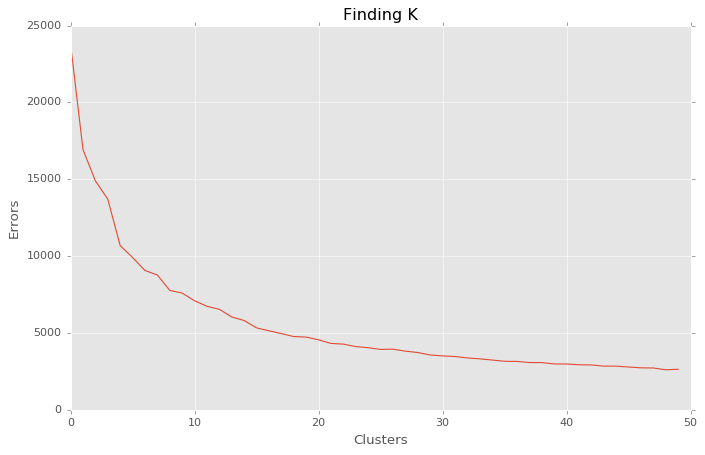

In [86]:
#finding K
find_k(features_copy.fillna(0))

Okay we will use 15 as our value for K. Now we're ready to implement our K-Means Clustering algorithm with K equal to 15 and look for tradable relationships.

Let's begin by initializing our model.

In [434]:
#initialzing K-Means algorithm
kmeans=KMeans(n_clusters=15,random_state=101)

Notice that I used random_state=101. This is so that you can recreate the same results posted here. We will now fit our K-Means Algorithm to our features data.

In [435]:
#fitting kmeans to our features data
kmeans.fit(features_copy.fillna(0))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

Note that we called the fillna method on our features_copy dataframe and replaced NaNs values with 0. We can now review our clusters. Let's start by checking our our labels.

In [436]:
#getting cluster labels
kmeans.labels_

array([ 6,  6,  6,  6, 12,  3,  0,  3, 13,  0,  3,  3, 12, 12, 12,  3,  3,
        7,  3,  6, 12,  3,  3,  1,  1,  5, 14,  3,  3, 12,  6,  0, 12,  3,
        3,  3,  3,  6,  3, 13,  3,  0,  3, 13,  3,  8,  0,  3, 13,  3,  3,
        2, 13,  0, 13,  3,  3,  3, 13, 12,  2, 12, 13,  0,  0, 13, 13,  3,
        0,  0,  3,  6,  7, 12,  7,  6,  6, 13,  3,  3, 13, 12,  0,  3,  3,
        0,  0, 12,  3,  3,  6,  3,  3,  3,  3, 13,  0,  6, 13,  5, 10,  0,
        3,  0, 13,  3,  3,  5,  5,  3,  3,  0,  3,  3,  5,  0,  0,  5,  3,
        3, 13,  0,  3,  3,  3,  6, 13,  7,  3,  0,  3,  6,  3,  0,  3,  3,
        0,  3,  0, 12, 13, 12,  3,  3,  3,  3,  3,  0,  3,  6,  3,  3,  0,
        0, 12,  3,  3,  0,  0,  0,  3, 12,  3,  0, 13, 13,  0, 13, 12, 11,
       13, 12,  3,  3,  0,  7,  3,  0,  3,  9,  3,  9,  3, 12,  0, 12,  3,
       13, 13,  3,  3, 12,  3, 12,  3,  3,  0,  3,  3,  3, 13, 13,  3,  3,
        0,  2,  3,  0,  0,  3,  6, 12,  6, 13,  3,  0,  3,  3,  3,  3,  3,
        3,  0,  3, 13,  3

We will now add our cluster assignments back to our dataframe.

In [437]:
#adding cluster labels to dataframe
features_copy['Cluster']=kmeans.labels_

Let's now review our features dataframe

In [438]:
#reviewing features dataframe
features_copy.head()

,P/E,EPS,MarketCap,Cluster
Symbol,,,,
MMM,23.17,8.16,112.74,6
ABT,48.03,0.94,77.76,6
ABBV,17.55,3.63,101.52,6
ACN,18.37,6.76,77.29,6
ATVI,37.55,1.28,36.13,12


In [439]:
#calling tail method our dataframe
features_copy.tail()

,P/E,EPS,MarketCap,Cluster
Symbol,,,,
YHOO,NaN,-0.23,43.74,0
YUM,15.83,4.04,22.65,3
ZBH,77.53,1.51,23.54,7
ZION,22.75,1.99,9.17,3
ZTS,32.16,1.65,26.11,12


Now that we have our cluster assignments, let's group our data by the cluster assignments.

In [440]:
#creating dataframe to hold data
clusters_df=pd.DataFrame()
#grouping our data by cluster for clusters with atleast 2 stocks in it.
clusters_df=pd.concat(i for clusters_df, i in features_copy.groupby(features_copy['Cluster']) if len(i) >1)

Let's now check of our new dataframe.

In [441]:
#checking the head of clusters df
clusters_df.head()

,P/E,EPS,MarketCap,Cluster
Symbol,,,,
ADBE,51.72,2.32,59.28,0
AET,20.37,6.41,45.93,0
AIG,NaN,-0.78,62.15,0
ANTM,18.02,9.21,43.89,0
AMAT,19.02,1.94,39.92,0


In [442]:
#checking the tail of our cluster df
clusters_df.tail()

,P/E,EPS,MarketCap,Cluster
Symbol,,,,
RIG,6.09,2.10,4.67,13
VRTX,NaN,-0.46,22.69,13
WDC,NaN,-1.59,22.12,13
WMB,NaN,-0.57,24.30,13
XRX,NaN,-0.49,7.48,13


Now that we have our data organized by cluster assignment, we're ready to check for tradeable relationships. To do this, we will create every possible pair combination within a respective cluster. We can then later run the CADF test on specific pairs from our clusters. Let's create a method that will take the symbols from a specific cluster as an input, compute the possible pair combinations of a respective cluster and store our pairs into a separate list.

In [99]:
#creating method to identify each possible pair 
def create_pairs(symbolList):
    #creating a list to hold each possible pair
    pairs=[]
    #initializing placeholders for the symbols in each pair
    x=0
    y=0
    for count,symbol in enumerate(symbolList):
        for nextCount,nextSymbol in enumerate(symbolList):
            x=symbol
            y=nextSymbol
            if x !=y:
                pairs.append([x,y])          
    
    return pairs

We will now create a list of symbols. Let's use the stock symbols from cluster 0.

In [4]:
#creating list of symbols from cluster 0
symbol_list_0=['ADBE','AET','AIG','ANTM','AMAT']

We will now use our create pairs method above to create a list of lists of the possible pair combinations.

In [444]:
#list of lists of pairs
all_pairs=create_pairs(symbol_list_0)

Let's check our pair combinations.

In [445]:
#printing list of all_pairs from cluster 0
all_pairs

[['ADBE', 'AET'],
 ['ADBE', 'AIG'],
 ['ADBE', 'ANTM'],
 ['ADBE', 'AMAT'],
 ['AET', 'ADBE'],
 ['AET', 'AIG'],
 ['AET', 'ANTM'],
 ['AET', 'AMAT'],
 ['AIG', 'ADBE'],
 ['AIG', 'AET'],
 ['AIG', 'ANTM'],
 ['AIG', 'AMAT'],
 ['ANTM', 'ADBE'],
 ['ANTM', 'AET'],
 ['ANTM', 'AIG'],
 ['ANTM', 'AMAT'],
 ['AMAT', 'ADBE'],
 ['AMAT', 'AET'],
 ['AMAT', 'AIG'],
 ['AMAT', 'ANTM']]

Okay. Now that we have our possible pair combinations from cluster 0, let's import our intraday data for these stocks. 

In [5]:
#initializing our stock variables
adbe=pd.read_csv('ADBE_5min.csv')
aet=pd.read_csv('AET_5min.csv')
aig=pd.read_csv('AIG_5min.csv')
antm=pd.read_csv('ANTM_5min.csv')
amat=pd.read_csv('AMAT_5min.csv')

Let's check our data.

In [447]:
#checking head of ADBE
adbe.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
0,2018/01/04,08:30:00,181.93,183.74,181.84,183.13,83862,396,22941,60921
1,2018/01/04,08:35:00,183.05,183.48,182.66,182.89,31593,238,17840,13753
2,2018/01/04,08:40:00,182.84,183.35,182.70,183.22,49654,345,26962,22692
3,2018/01/04,08:45:00,183.25,183.73,183.06,183.73,51108,314,21566,29542
4,2018/01/04,08:50:00,183.66,184.00,183.56,183.90,27476,196,15287,12189


In [448]:
#checking tail of AIG
aig.tail()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
8574,2018/06/12,14:30:00,54.54,54.56,54.51,54.55,60902,357,20106,40796
8575,2018/06/12,14:35:00,54.55,54.61,54.53,54.60,74483,425,29354,45129
8576,2018/06/12,14:40:00,54.60,54.60,54.55,54.58,67539,414,20687,46852
8577,2018/06/12,14:45:00,54.57,54.58,54.54,54.56,82122,439,24925,57197
8578,2018/06/12,14:50:00,54.56,54.62,54.56,54.60,120328,779,46340,73988


We can see that we have 5 min bar data for our stocks ranging from January 3 2018 to the first half of the session on June 11 2018. We can now test our pairs for cointegration. Recall that we are going to use part of our data as our assessment period so we don't want to include it in our test.


We'll use January to May as our training period and assess our portfolios over the remainder of our data. Let's create variables to hold our training period data. We'll store use our Close column.

So that we can parse out our data by our training period, we'll make our date column the index of our data. We begin by making a copy of our data.

Let's create a method to perform this across our symbols data. We'll store our original symbols data in a dictionary and pass it into our function.

In [6]:
#creating list to hold original data
original_data={'ADBE':adbe,'AET':aet,'AIG':aig,'ANTM':antm,'AMAT':amat}

We can now create our function to copy our original data and create a dataframe for our training period data.

In [7]:
#function to parse out training period data
def get_training_data(original_data,symbol_list,start,end):
    '''
    PARAMETERS:
    
    original_data - the dictionary we created that holds our dataframes
    symbol_list - the list of symbols; data type are strings
    start - the beginning date of our training period as a string
    end - the ending date of our training period as a string
    '''
    
    #creating a dataframe to hold our parsed series
    training_df=pd.DataFrame()
    
    
    #iterating over our symbol list
    for count, symbol in enumerate(symbol_list):
        
        try:
        
            #making a copy of our original data for each symbol
            copy=original_data[symbol].copy()

            #reindexing our copied data by Date column
            copy=copy.reindex(index=copy['Date'],columns=copy.columns)

            #restoring values of close column from our original data
            copy[' Close']=original_data[symbol][' Close'].values

            #parsing out our training period
            copy=copy.loc[start:end][' Close']
            
            #adding training data to dataframe
            training_df[str(symbol)]=copy.values
        
        except:
            print(str(symbol),'Threw an Exception')
            print('Current Symbol Length:')
            print(len(copy.loc[start:end]))
            print("")
            print('training_df Length:')
            print(len(training_df))
            continue
    
    return training_df
    

We're now ready to create our training data. We'll use our get_training_data function to parse out our training data and then use this dataframe to parse out the respective series for our pair combinations to perform our CADF test.

In [8]:
#creating our training data dataframe using our training period start and end dates
training_df=get_training_data(original_data,symbol_list_0,'2018/01/04','2018/04/30')

Let's check our training_df.

In [451]:
training_df.head()

,ADBE,AET,AIG,ANTM,AMAT
0,183.13,183.45,60.36,229.62,54.67
1,182.89,183.68,60.61,229.63,54.51
2,183.22,183.80,60.77,229.70,54.25
3,183.73,183.82,60.81,229.65,54.08
4,183.90,183.93,60.80,229.70,54.27


After checking our dataframe, we find that we have our trainging period data for all of our stocks. This means that we should have 20 possible pairs. We can write a method to check our math.

In [413]:
#creating method to check possible pair combinations
def possible_combinations(n):
    #Parameters#
    ############
    #n- represents the number of items or in our case stocks
    
    possible_pairs=(n*(n-1))
    
    return possible_pairs

Now let's check our possible pair combinations.

In [453]:
#checking possible pair combinations
possible_combinations(5) # we pass in 5 for our 5 stocks

20

We're now ready to check our pairs for cointegration. We'll create a method that will allow us to iterate over our pairs, compute the slope and then perform the CADF test. The pairs that are cointegrated will be stored in a list.

Let's import our OLS method.

In [9]:
from scipy.stats import linregress

Now we'll write our method to create our cointegrated pairs.

In [334]:
def get_cointegrated(all_pairs,training_df):
    '''
    PARAMETERS
    #########
    
    all_pairs - the list of all possible pair combinations from Cluster 0
    training_df - our dataframe holding our stock data for stocks in Cluster 0 over the training period 
    
    '''
    
    #creating a list to hold cointegrated pairs
    cointegrated=[]
    
        
    #iterate over each pair in possible pairs list; pair is a list of our 2 stock symbols
    for count, pair in enumerate(all_pairs):
        try:
            
            #getting data for each stock in pair from training_df
            ols=linregress(training_df[str(pair[1])],training_df[str(pair[0])]) #note scipy's linregress takes in Y then X
                        
            #storing slope or hedge ratio in variable
            slope=ols[0]
            
            
            #creating spread 
            spread=training_df[str(pair[1])]-(slope*training_df[str(pair[0])])
                       
            #testing spread for cointegration
            cadf=adfuller(spread,1)
            
            #checking to see if spread is cointegrated, if so then store pair in cointegrated list
            if cadf[0] < cadf[4]['1%']:
                print('Pair Cointegrated at 99% Confidence Interval')
                #appending the X and Y of pair
                cointegrated.append([pair[0],pair[1]])
            elif cadf[0] < cadf[4]['5%']:
                print('Pair Cointegrated at 95% Confidence Interval')
                #appending the X and Y of pair
                cointegrated.append([pair[0],pair[1]])
            elif cadf[0] < cadf[4]['10%']:
                print('Pair Cointegrated at 90% Confidence Interval')
                cointegrated.append(pair[0],pair[1])
            else:
                print('Pair Not Cointegrated ')
                continue
        except:
            print('Exception: Symbol not in Dataframe')
            continue
        
    return cointegrated
        


Let's initialize our get_cointegrated function and find our cointegrated pairs.

In [454]:
#getting our cointegrated pairs
cointegrated_from_cluster_0=get_cointegrated(all_pairs,training_df)

Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Cointegrated at 95% Confidence Interval
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Cointegrated at 95% Confidence Interval
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Cointegrated at 95% Confidence Interval
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 


Let's check our cointegrated list.

In [455]:
cointegrated_from_cluster_0

[['ADBE', 'ANTM'], ['AET', 'ANTM'], ['ANTM', 'AET']]

Okay. We've found that 3 of our possible 20 pairs are cointegrated each at the 90% confidence interval. Recall that we called the head method on our clusters_df dataframe of which returns only the first five rows. Let's use the Counter method to get an idea of how our symbols are distributed across all our clusters.

In [387]:
#importing the Counter method
from collections import Counter

In [456]:
#calling Counter method on our clusters
Counter(clusters_df['Cluster'])

Counter({0: 76,
         1: 3,
         2: 5,
         3: 215,
         4: 2,
         5: 19,
         6: 39,
         7: 13,
         9: 4,
         11: 3,
         12: 69,
         13: 54})

We can see that Cluster 0 actually contains a total of 76 symbols. Given that we found 3 tradeable relationships, we'll use these. However, I will illustrate how, in the event that none of the symbols in our first cluster were cointegrated, we would go about checking the symbols in a specific cluster.

 We'll need to create a method that will allow us to iterate over our clusters column and return the symbols that are within a specific cluster. To begin we'll add our symbols back to our dataframe as a column so that we can retrieve them if our cluster condition is met.

In [457]:
#adding Symbol Column back to cluster_df
clusters_df['Symbol']=clusters_df.index

Let's recheck our dataframe.

In [458]:
#checking update to cluster_df
clusters_df.head()

,P/E,EPS,MarketCap,Cluster,Symbol
Symbol,,,,,
ADBE,51.72,2.32,59.28,0,ADBE
AET,20.37,6.41,45.93,0,AET
AIG,NaN,-0.78,62.15,0,AIG
ANTM,18.02,9.21,43.89,0,ANTM
AMAT,19.02,1.94,39.92,0,AMAT


Now we're ready to create our method of retrieving and storing our symbols in a list based on our cluster. For this task, we'll use a list comprehension. We'll apply our method to cluster 9.

In [459]:
symbols_cluster_9=[ clusters_df['Symbol'][count] for count,value in enumerate(clusters_df['Cluster'].values) if value == 9]

Let's check the length of our symbols_cluster_9 list to ensure that our method worked correctly. Recall that our Counter method returned a value of 4 for the number of symbols in this cluster.

In [460]:
#getting the length of our cluster 9 list
len(symbols_cluster_9)

4

Great! We see that our list comprehension is working properly. Now we can use this list of symbols to create every possible pair combination for cluster 9. Let's check what symbols are in cluster 9.

In [461]:
#checking the symbols in cluster 9
symbols_cluster_9

['XOM', 'FB', 'JNJ', 'JPM']

We'll now use this list to create our pair combinations for cluster 9 using our create_pairs method from earlier.

In [462]:
#getting pair combinations for cluster 9
cluster_9_pairs=create_pairs(symbols_cluster_9)

Let's check our pair combinations for cluster 9.

In [464]:
#checking cluster 9 pair combinations.
cluster_9_pairs

[['XOM', 'FB'],
 ['XOM', 'JNJ'],
 ['XOM', 'JPM'],
 ['FB', 'XOM'],
 ['FB', 'JNJ'],
 ['FB', 'JPM'],
 ['JNJ', 'XOM'],
 ['JNJ', 'FB'],
 ['JNJ', 'JPM'],
 ['JPM', 'XOM'],
 ['JPM', 'FB'],
 ['JPM', 'JNJ']]

Okay. We've learned that we have three tradeable relationships from Cluster 0 from the first five symbols we tested. We've also walked through how we would find other pairs in other clusters if we had not found these three pairs. After finding the pairs above, we would apply the same method to check for cointegration as was used to identify our three pairs.

From here we are ready to begin constructing our portfolios.

## Brief Recap

Let's take a step back and review what we've accomplished thus far. We began by gaining an understanding of the SPO Framework. We then performed K-Means Clustering on the S&P 500. We found an optimal value for K by creating the elbow graph using our fundamental data features.

After finding K, we created our K-Means algorithm and selected stocks from Cluster 0 to test whether or not we could identify tradeable relationships. Out of the first five symbols in Cluster 0, we found that 3 of the 20 possible combinations were cointegrated.

To illustrate how we would proceed had we not found any tradeable relationships, we created a method that would allow us to select all of the stocks from within a specific cluster and use these to create all possible pair combinations. With these pairs in hand, we could then test these pairs to see if we could find tradeable relationships. 

# Portfolio Construction: Equal Weighted

Now that we have found some likely tradeable relationships, we're ready to construct our portfolio. In this section we're going to create a portfolio that equally weighs our strategy. We'll assume that we have a portfolio value of $100k USD with 10% in cash.

We will allocate $30k USD to each of our pairs. To begin we will create a class that will allow us to create our StatArb strategies. Recall, our training period for our portfolios that will be employing the use of machine learning is 1/4/2018 to 4/30/2018, thus because this portfolio will not be employing the use of any optimization method, we will construct it over the period beginning 5/1/2018 so that it is consistent with the test period of our remaining portfolios.

Let's now create the variables of each of our symbols that will hold the data beginning 5/1/2018. We'll make a copy of our data and set our date as the index so that we can parse out our test period.

In [10]:
#creating copies of our data
adbe_copy=adbe.copy()
aet_copy=aet.copy()
antm_copy=antm.copy()

In [11]:
#reindexing our data
adbe_copy=adbe_copy.reindex(index=adbe_copy['Date'],columns=adbe_copy.columns)
aet_copy=aet_copy.reindex(index=aet_copy['Date'],columns=aet_copy.columns)
antm_copy=antm_copy.reindex(index=antm_copy['Date'],columns=antm_copy.columns)


Okay. Let's check our dataframe. 

In [477]:
#checking dataframe after reindexing
adbe_copy.head()

,Date,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
Date,,,,,,,,,,
2018/01/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/01/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/01/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/01/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/01/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's restore the values back to our columns. We'll also drop the date column.

In [12]:
#dropping date columns
adbe_copy.drop('Date',axis=1,inplace=True)
aet_copy.drop('Date',axis=1,inplace=True)
antm_copy.drop('Date',axis=1,inplace=True)

In [13]:
#restoring our column values back to our data
adbe_copy[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']]=adbe[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']].values
aet_copy[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']]=aet[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']].values
antm_copy[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']]=antm[[' Time',' Open',' High',' Low',' Close',' Volume',' NumberOfTrades',' BidVolume',' AskVolume']].values

Let's recheck our dataframe.

In [484]:
#rechecking our dataframe
adbe_copy.head()

,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
Date,,,,,,,,,
2018/01/04,08:30:00,181.93,183.74,181.84,183.13,83862,396,22941,60921
2018/01/04,08:35:00,183.05,183.48,182.66,182.89,31593,238,17840,13753
2018/01/04,08:40:00,182.84,183.35,182.70,183.22,49654,345,26962,22692
2018/01/04,08:45:00,183.25,183.73,183.06,183.73,51108,314,21566,29542
2018/01/04,08:50:00,183.66,184.00,183.56,183.90,27476,196,15287,12189


Now we're ready to slice out our test period.

In [14]:
#creating variables to hold testing period data
adbe_test=adbe_copy.loc['2018/05/01':]
aet_test=aet_copy.loc['2018/05/01':]
antm_test=antm_copy.loc['2018/05/01':]

Let's check the head and tail of our data.

In [555]:
#checking beginning of test period
adbe_test.head()

,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
Date,,,,,,,,,
2018/05/01,08:30:00,220.77,221.28,220.33,220.88,52351,233,39904,12447
2018/05/01,08:35:00,220.95,221.34,219.78,220.09,31969,242,15350,16619
2018/05/01,08:40:00,220.10,220.15,219.38,219.64,26163,175,14622,11541
2018/05/01,08:45:00,219.52,220.55,219.52,220.34,22756,117,10890,11866
2018/05/01,08:50:00,220.31,220.82,220.24,220.51,23994,89,18044,5950


In [556]:
#checking the end of test period
adbe_test.tail()

,Time,Open,High,Low,Close,Volume,NumberOfTrades,BidVolume,AskVolume
Date,,,,,,,,,
2018/06/12,14:30:00,252.26,252.35,252.25,252.34,35644,285,15996,19648
2018/06/12,14:35:00,252.35,252.35,252.05,252.27,32074,261,14746,17328
2018/06/12,14:40:00,252.27,252.32,252.12,252.20,25809,222,13909,11900
2018/06/12,14:45:00,252.19,252.36,252.06,252.36,43128,340,19684,23444
2018/06/12,14:50:00,252.40,252.53,252.29,252.47,53480,450,25475,28005


We can now parse out our closing values from our test period dataframes.


In [15]:
#Closing price series for data
adbe_test_price_series=np.array(adbe_test[' Close'])
aet_test_price_series=np.array(aet_test[' Close'])
antm_test_price_series=np.array(antm_test[' Close'])

Let's check one of our price series. We'll use AET.

In [562]:
#checking head of AET price series
aet_test_price_series[0:5]

array([ 180.42,  179.7 ,  179.3 ,  179.53,  179.7 ])

We can now construct our StatArb class and create our individual strategies. We will then combine these individual strategies into an equally weighted portfolio.

In [16]:
class statarb(object):
    
    def __init__(self,df1, df2,ma,floor, ceiling,beta_lookback,start,end,exit_zscore=0):
        #setting the attributes 
        self.df1=df1 #array of prices for X
        self.df2=df2 #array of prices for Y
        self.ma=ma# the lookback period 
        self.floor=floor #the buy threshold for the z-score
        self.ceiling=ceiling #the sell threshold for the z-score
        self.Close='Close Long'  #used as close signal for longs
        self.Cover='Cover Short' #used as close signal for shorts
        self.exit_zscore=exit_zscore  #the z-score
        self.beta_lookback=beta_lookback #the lookback for hedge ratio
        self.start=start #the beginning of test period as a string
        self.end=end    # the end of test period as a string
        
    #create price spread
    def create_spread(self):
        
        #creating new dataframe
        self.df=pd.DataFrame(index=range(0,len(self.df1)))
        
        try:
            self.df['X']=self.df1
            self.df['Y']=self.df2
        except:
            print('Length of self.df:')
            print(len(self.df))
            print('')
            print('Length of self.df1:')
            print(len(self.df1))
            print('')
            print('Length of self.df2:')
            print(len(self.df2))
            
        
        #calculating the beta of the pairs 
        ols=linregress(self.df['Y'],self.df['X'])
        self.df['Beta']=ols[0]
        
        #calculating the spread
        self.df['Spread']=self.df['Y']-(self.df['Beta'].rolling(window=self.beta_lookback).mean()*self.df['X'])
            
            
            
            
        return self.df.head()
    
            
    def generate_signals(self):
        

            #creating the z-score
            self.df['Z-Score']=(self.df['Spread']-self.df['Spread'].rolling(window=self.ma).mean())/self.df['Spread'].rolling(window=self.ma).std()

            #prior z-score
            self.df['Prior Z-Score']=self.df['Z-Score'].shift(1)

            #Creating Buy and Sell Signals; when to be long, short, exit
            self.df['Longs']=(self.df['Z-Score']<=self.floor)*1.0 #buy the spread
            self.df['Shorts']=(self.df['Z-Score']>=self.ceiling)*1.0 #short the spread
            self.df['Exit']=(self.df['Z-Score']<=self.exit_zscore)*1.0

            #tracking positions via for loop implementation
            self.df['Long_Market']=0.0
            self.df['Short_Market']=0.0

            #Setting Variables to track whether or not to be long while iterating over df
            self.long_market=0
            self.short_market=0

            #Determining when to trade
            for i,value in enumerate(self.df.iterrows()):
                #Calculate longs
                if value[1]['Longs']==1.0:
                    self.long_market=1

                if value[1]['Shorts']==1.0:
                    self.short_market=1

                if value[1]['Exit']==1.0:

                    self.long_market=0
                    self.short_market=0

                self.df.iloc[i]['Long_Market']=self.long_market
                self.df.iloc[i]['Short_Market']=self.short_market


        
            return 
        
    def create_returns(self, allocation,pair_number):
            '''
            PARAMETERS
            ##########
            allocation - the amount of capital alotted for pair
            pair_number - string to annotate the plots

            '''
            self.allocation=allocation 
            self.pair=pair_number

            self.portfolio=pd.DataFrame(index=self.df.index)
            self.portfolio['Positions']=self.df['Long_Market']-self.df['Short_Market']
            self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
            self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
            self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']


            #creating a percentage return stream
            self.portfolio['Returns']=self.portfolio['Total'].pct_change()
            self.portfolio['Returns'].fillna(0.0,inplace=True)
            self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
            self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)


            #calculating metrics
            self.mu=(self.portfolio['Returns'].mean())
            self.sigma=(self.portfolio['Returns'].std())
            self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
            self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
            self.wins=self.portfolio['Win'].sum()
            self.losses=self.portfolio['Loss'].sum()
            self.total_trades=self.wins+self.losses
            #calculating sharpe ratio with interest rate of 
            #interest_rate_assumption=0.75
            #self.sharp=(self.mu-interest_rate_assumption)/self.sigma

            #win loss ratio; 
            self.win_loss_ratio=(self.wins/self.losses)

            #probability of win
            self.prob_of_win=(self.wins/self.total_trades)
            #probability of loss
            self.prob_of_loss=(self.losses/self.total_trades)

            #average return of wins
            self.avg_win_return=(self.portfolio['Returns']>0).mean()
            #average returns of losses
            self.avg_loss_return=(self.portfolio['Returns']<0).mean()
            #calculating payout ratio
            self.payout_ratio=(self.avg_win_return/self.avg_loss_return)

            #calculate equity curve
            self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
            self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
            self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
            self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
            self.portfolio['Initial Value']=self.allocation

            with plt.style.context(['ggplot','seaborn-paper']):
                #Plotting Portfolio Value   
                plt.plot(self.portfolio['Portfolio Value'])
                plt.plot(self.portfolio['Initial Value'])
                plt.title('%s Strategy Returns '%(self.pair))
                plt.legend(loc=0)
                plt.show()


            return 
        


Okay we're ready to apply our StatArb class to create our strategies. Recall that our pairs are ADBE & ANTM, ANTM & AET and AET & ANTM. You may be wondering why we're using ANTM & AET and AET & ANTM. This is because though both pairs use the same symbols, they are in fact two completely different relationships. In the first pair, ANTM is the X and AET is the Y. In a sense, we're asking what degree of variation in AET can be explained by a unit change in ANTM. In contrast, in the AET & ANTM pair, we're asking what degree of variation in ANTM can be explained by a unit change in AET. When we compute the slope or derivative, we get two completly different numbers, and thus two different relationships.

Let's now apply our StatArb class to our first pair.

In [17]:
#ADBE & ANTM statarb initialization
#passing in X, Y, MA, Floor, Ceiling, Beta Lookback, Start, End
adbe_antm=statarb(adbe_test_price_series,antm_test_price_series,17,-2,2,17,adbe_test.iloc[0],adbe_test.iloc[-1])

Let's now create our spread and generate our signals.

In [18]:
#creating spread
adbe_antm.create_spread()

,X,Y,Beta,Spread
0,220.88,236.05,-0.763772,NaN
1,220.09,236.74,-0.763772,NaN
2,219.64,237.11,-0.763772,NaN
3,220.34,237.26,-0.763772,NaN
4,220.51,236.76,-0.763772,NaN


We can now generate our signals and compute our returns on our allocation of $30k USD.

In [19]:
#generating signals
adbe_antm.generate_signals()

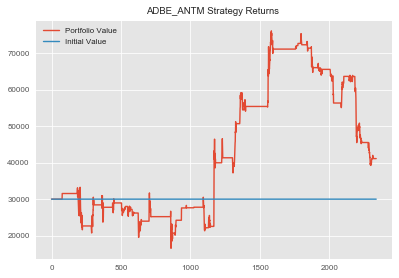

In [20]:
#creating returns and passing in our allocation amount
adbe_antm.create_returns(30000,'ADBE_ANTM')

We can repeat this process for our remaining pairs. Note, our create_spread method returned the head of our dataframe containing our spread. We used a lookback of 17 which is explains why those values are NaNs.

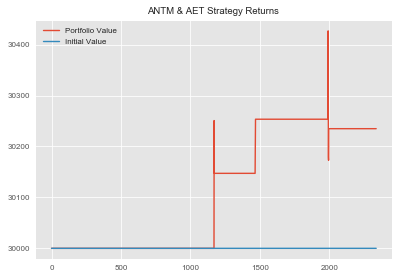

In [21]:
#repeating process for ANTM and AET
antm_aet=statarb(antm_test_price_series,aet_test_price_series,6,-2,2,6,antm_test.iloc[0],antm_test.iloc[-1])
antm_aet.create_spread()
antm_aet.generate_signals()
antm_aet.create_returns(30000,'ANTM & AET')

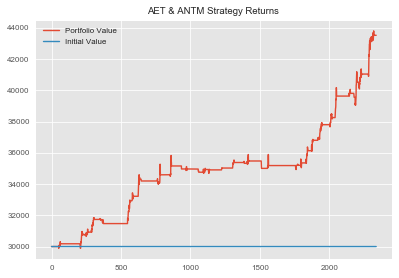

In [22]:
#repeating process for AET and ANTM
aet_antm=statarb(aet_test_price_series,antm_test_price_series,12,-2,2,12,aet_test.iloc[0],aet_test.iloc[-1])
aet_antm.create_spread()
aet_antm.generate_signals()
aet_antm.create_returns(30000,'AET & ANTM')

Okay. Not that we have create our individual StatArb implementations, we can combine these into a portfolio, calculate our portfolio returns, mu, sigma, and Sharpe ratio. Note, to compute the Sharpe we will need to make an assumption about the level of interest rates. In as of December 2017, the fed funds rate was 1.5%. We'll use this as our interest rate assumption.

Recall that we started with a portfolio value of 100k USD. We allocated 10k USD to cash and equally weighted our StatArb strategies.

### Creating the Equally Weighted Portfolio

We included a portfolio value variable in our statarb class. We'll use this to create our total equally weighted portfolio.

In [23]:
#creating dataframe for equally weighted portfolio
equally_weighted=pd.DataFrame()
equally_weighted['ADBE_ANTM']=adbe_antm.portfolio['Portfolio Value']
equally_weighted['ANTM_AET']=antm_aet.portfolio['Portfolio Value']
equally_weighted['AET_ANTM']=aet_antm.portfolio['Portfolio Value']
equally_weighted['Cash']=10000
equally_weighted['Total Portfolio Value']=equally_weighted['ADBE_ANTM']+equally_weighted['ANTM_AET']+equally_weighted['AET_ANTM']+equally_weighted['Cash']


Let's check our equally_weighted portfolio dataframe.

In [648]:
equally_weighted.head()

,ADBE_ANTM,ANTM_AET,AET_ANTM,Cash,Total Portfolio Value
0,30000.0,30000.0,30000.0,10000,100000.0
1,30000.0,30000.0,30000.0,10000,100000.0
2,30000.0,30000.0,30000.0,10000,100000.0
3,30000.0,30000.0,30000.0,10000,100000.0
4,30000.0,30000.0,30000.0,10000,100000.0


We can now add our returns column and then use it to compute our mu,sigma and Sharpe ratio.

In [24]:
#adding returns column
equally_weighted['Returns']=np.log(equally_weighted['Total Portfolio Value']/equally_weighted['Total Portfolio Value'].shift(1))

In [676]:
#rechecking our dataframe
equally_weighted.head()

,ADBE_ANTM,ANTM_AET,AET_ANTM,Cash,Total Portfolio Value,Returns
0,30000.0,30000.0,30000.0,10000,100000.0,NaN
1,30000.0,30000.0,30000.0,10000,100000.0,0.0
2,30000.0,30000.0,30000.0,10000,100000.0,0.0
3,30000.0,30000.0,30000.0,10000,100000.0,0.0
4,30000.0,30000.0,30000.0,10000,100000.0,0.0


We'll now get our Mu, Sigma, and Sharpe and store them in variables.

In [25]:
#initializing Equally_Weighted portfolio metrics
equally_weighted_mu=equally_weighted['Returns'].mean()
equally_weighted_sigma=equally_weighted['Returns'].std()

#initializing interest rate assumption of 1.5%
rate=0.015

#computing Sharpe
equally_weighted_Sharpe=round((equally_weighted_mu-rate)/equally_weighted_sigma,2)

Okay, let's check the Sharpe Ratio of our Equally Weighted Portfolio.

In [689]:
#getting Equally Weighted Portfolio Sharpe

print('Equally Weighted Portfolio Sharpe:',equally_weighted_Sharpe)

Equally Weighted Portfolio Sharpe: -2.1


Let's plot our portfolio equity curve.

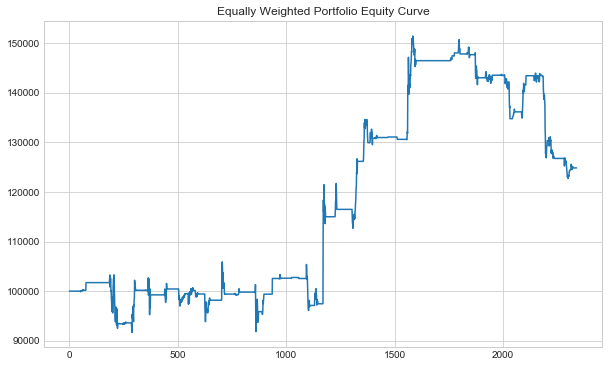

In [26]:
#plotting Equally Weighted Equity Curve
plt.figure(figsize=(10,6))
plt.plot(equally_weighted['Total Portfolio Value'])
plt.title('Equally Weighted Portfolio Equity Curve')
plt.show()

We can see that even though our equally weighted portfolio value increased, it still had a negative Sharpe.

We can repeat this process for our remaining portfolios and compare our Sharpe ratios.

# Portfolio Construction: Efficient Frontier

Thus far we've created our Equally Weighted Portfolio and checked our Sharpe Ratio and Equity Curve. We are no interested in what our Sharpe might be if we found the optimal weightes for each of our StatArb implementations as well as the resulting effect on our equity curve.

We will now turn our attention to simulating our portfolio's mean and variance by assigning random weights to each of our pairs. We will store our portfolio's mean return and sigma and create a scatter plot that will aid us in selecting the most efficient weights for each of our strategy implementations. To best decipher how we should weight our strategy implementations we will include logic that computes the Sharpe Ratios for each portfolio created.

We can then create new instances of our StatArb implementations using updated allocations and survey the effects on our Sharpe Ratio and equity curve. Though our Bottom Up Portfolio will be an extension of our Equally Weighted Portfolio in that it will only apply our machine learning concepts to the microstructure components, our SPO Framework will combine the weights found within this portfolio construcution process and combine it with the process of constructing the Bottom Up Portfolio.

To begin, let's retieve the MUs and Sigmas of our pairs. Recall that we created a method within class that stores our mean and sigma. We can use our strategy objects to retrieve these variables.

In [27]:
#initialzing Mus and Sigmas
#ADBE & ANTM
adbe_antm_mu=adbe_antm.mu
adbe_antm_sigma=adbe_antm.sigma
#ANTM & AET
antm_aet_mu=antm_aet.mu
antm_aet_sigma=antm_aet.sigma
#AET & ANTM
aet_antm_mu=aet_antm.mu
aet_antm_sigma=aet_antm.sigma

The return of our portfolio can be expressed as 

$$\large \sum_i \rm w_i \rm r_i $$ or as $$\large w_1 \rm r_1 + w_2 \rm r_2 + w_i \rm r_i $$ where $\large w_i$ is the weight of the $\large i_{th}$ asset and $\large r_i$ is the return of the $\large i_{th}$ asset.

Let's create a method to compute returns.

In [28]:
#computing log returns for our portfolio values
returns=np.log(equally_weighted[['ADBE_ANTM','ANTM_AET','AET_ANTM']]/equally_weighted[['ADBE_ANTM','ANTM_AET','AET_ANTM']].shift(1))

Let's check our returns.

In [744]:
#checking returns
returns.head()

,ADBE_ANTM,ANTM_AET,AET_ANTM
0,NaN,NaN,NaN
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


We can now create our mean returns an annualize them.

In [29]:
avg_returns_252=returns.mean()*252

Let's check our average annualized returns.

In [749]:
#checking average annualized returns
avg_returns

[0.00045914208401620995, 3.3720231332227273e-06, 0.00016147773221808213]

The variance of our portfolio can be expressed as $$\large  \sum_{i\in I} \rm \sum_{j\in I} w_{i}w_{j}\rm \sigma_{ij} $$ where $\large w_i$ is the weight of the $\large i_{th} $ asset, $\large w_j$ is the weight of the $\large j_{th}$ asset.

Now we will use our returns to create our annualized covariance matrix.

In [30]:
covariance_matrix=returns.cov()*252

Let's check our covariance matrix.

In [32]:
covariance_matrix

,ADBE_ANTM,ANTM_AET,AET_ANTM
ADBE_ANTM,0.156866,1.205435e-04,-2.591987e-03
ANTM_AET,0.000121,1.834339e-05,-1.338726e-07
AET_ANTM,-0.002592,-1.338726e-07,1.212121e-03


We can now create a variable to hold our weights for each strategy.

In [31]:
#assigning weights
weights=np.random.random(len(returns.columns))
weights/=np.sum(weights)


In [34]:
#reviewing weights
weights

array([ 0.22235774,  0.15788307,  0.61975919])

The following method is an adaptation from Dr. Yves Hilpisch's "Python for Finance". We'll use it to plot our Efficient Frontier and find the most optimial weights for our strategies.

In [32]:
#importing optimization function
import scipy.optimize as sco

In [33]:

def efficient_frontier(returns,rate=0.015):
   
    #creating a list to hold our portfolio returns, variance and Sharpe values
    portfolio_returns=[]
    portfolio_volatility=[]
    p_sharpes=[]
    
   # returns=returns_df
    
    for i in range(500):
        #assigning weights
        weights=np.random.random(len(returns.columns))
        weights/=np.sum(weights)

        #getting returns
        current_return=np.sum(returns.mean()*weights)*252
        portfolio_returns.append(current_return)
        
        #getting variances
        variance=np.dot(weights.T,np.dot(returns.cov()*252,weights))
        #getting volatility
        volatility=np.sqrt(variance)
        portfolio_volatility.append(volatility)
        
        #getting Sharpe ratios
        ratio=(current_return-rate)/volatility
        #storing Sharpe in list
        p_sharpes.append(ratio)
    
    p_returns=np.array(portfolio_returns)
    p_volatility=np.array(portfolio_volatility)
    p_sharpes=np.array(p_sharpes)
    
    #plotting
    plt.figure(figsize=(10,6))
    plt.scatter(p_volatility,p_returns,c=p_sharpes, marker='o')
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()
    
    return
    

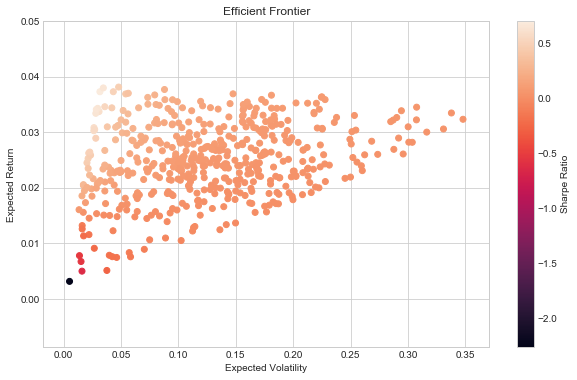

In [875]:
efficient_frontier(returns.fillna(0))


In [34]:
def stats(weights,rate=0.015):
    weights=np.array(weights)
    p_returns=np.sum(returns.mean()*weights)*252
    p_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    p_sharpe=(p_returns-rate)/p_volatility
    
    return np.array([p_returns,p_volatility,p_sharpe])

    

In [38]:
#testing stats method
stats(weights)

array([ 0.0325289 ,  0.08669494,  0.20219057])

In [35]:
#creating function for optimization
def minimize_func(weights):
        return -stats(weights)[2]
    
   

In [40]:
#testing optimization function
minimize_func(weights)

-0.20219056844039546

In [36]:
def get_optimal_weights(weights):
    #Finding Most Optimal Weights
    #variables for optimization
    constraints=({'type':'eq','fun':lambda x: np.sum(x)-1})
    bounds=tuple((0,1) for x in range(len(returns.columns)))

    starting_weights=len(returns.columns)*[1./len(returns.columns)]
    most_optimal=sco.minimize(minimize_func,starting_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    best_weights=most_optimal['x'].round(3)

    return best_weights, print('Weights:',best_weights)

In [37]:
#storing optimal weights in a variable
optimal_weights=get_optimal_weights(weights)

Weights: [ 0.022  0.     0.978]


Okay. We can see that the most optimal weights are to allocate 2% of our capital to ADBE_ANTM, 0% to ANTM_AET and 97.8% to AET_ANTM. Recall that we our method was designed to optimize our Sharpe ratio. 

We can now implement another instance of our strategies using these weights and create our portfolio and compute its equity curve.

Let's create our second instance of the ADBE_ANTM pair. We'll create a total_allocation variable that we can use to compute our allocation to our strategies.

In [38]:
#total allocation variable
total_allocation=90000 #100k less 10k cash

#ADBE_ANTM Allocation
adbe_antm_allocation=round(total_allocation*optimal_weights[0][0],2)

#AET_ANTM Allocation
aet_antm_allocation=round(total_allocation*optimal_weights[0][2],2)

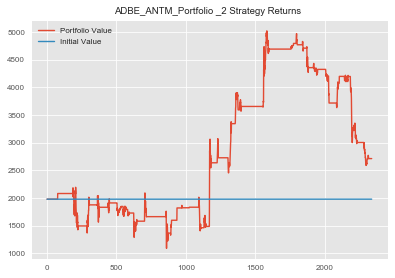

In [39]:
#creating 2nd instance of first pair
adbe_antm_2=statarb(adbe_test_price_series,antm_test_price_series,17,-2,2,17,adbe_test.iloc[0],adbe_test.iloc[-1])
adbe_antm_2.create_spread()
adbe_antm_2.generate_signals()

#notice here we're using our updated allocation
adbe_antm_2.create_returns(adbe_antm_allocation,'ADBE_ANTM_Portfolio _2')

Recall that our second pair recieved a 0% allocation. We will thus create our 3rd pair with the updated weight and create our new portfolio.

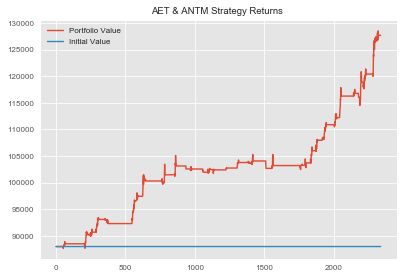

In [40]:
#AET_ANTM 2nd implementation
aet_antm_2=statarb(aet_test_price_series,antm_test_price_series,12,-2,2,12,aet_test.iloc[0],aet_test.iloc[-1])
aet_antm_2.create_spread()
aet_antm_2.generate_signals()
aet_antm_2.create_returns(aet_antm_allocation,'AET & ANTM')

We are now ready to compose our Efficient Frontier Portfolio.

### Creating the Efficient Frontier Portfolio

Let's create our Efficient Frontier Portfolio.

In [41]:
#creating dataframe for Efficient Frontier Portfolio
efficient_frontier_portfolio=pd.DataFrame()
efficient_frontier_portfolio['ADBE_ANTM']=adbe_antm_2.portfolio['Portfolio Value']
efficient_frontier_portfolio['AET_ANTM']=aet_antm_2.portfolio['Portfolio Value']
efficient_frontier_portfolio['Cash']=10000
efficient_frontier_portfolio['Total Portfolio Value']=efficient_frontier_portfolio['ADBE_ANTM']+efficient_frontier_portfolio['AET_ANTM']+efficient_frontier_portfolio['Cash']


We can now add our returns column to our Efficient Frontier Dataframe.

In [42]:
#adding returns column to Efficient Frontier Dataframe
efficient_frontier_portfolio['Returns']=np.log(efficient_frontier_portfolio['Total Portfolio Value']/efficient_frontier_portfolio['Total Portfolio Value'].shift(1))

We can now check our Efficient Frontier Portfolio Dataframe.


In [927]:
#checking head of Efficient Frontier Portfolio dataframe
efficient_frontier_portfolio.head()

,ADBE_ANTM,AET_ANTM,Cash,Total Portfolio Value,Returns
0,1980.0,88020.0,10000,100000.0,NaN
1,1980.0,88020.0,10000,100000.0,0.0
2,1980.0,88020.0,10000,100000.0,0.0
3,1980.0,88020.0,10000,100000.0,0.0
4,1980.0,88020.0,10000,100000.0,0.0


We'll now plot the equity curve for our Efficient Frontier Portfolio.

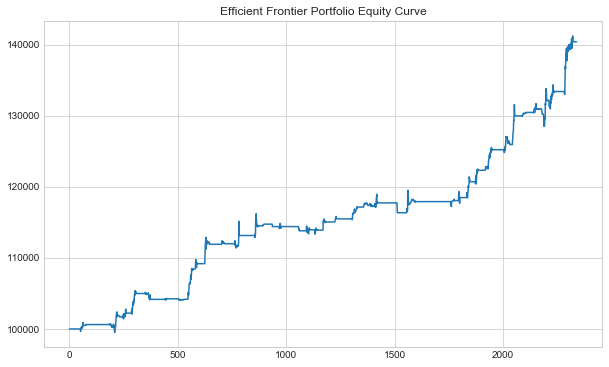

In [43]:
#plotting Equity Curve for Efficient Frontier Portfolio
plt.figure(figsize=(10,6))
plt.plot(efficient_frontier_portfolio['Total Portfolio Value'])
plt.title('Efficient Frontier Portfolio Equity Curve')
plt.show()

We can now store our Mu, Sigma, and Sharpe for our Efficient Frontier Portfolio in variables.

In [44]:
efficient_frontier_portfolio_mu=efficient_frontier_portfolio['Returns'].mean()
efficient_frontier_portfolio_sigma=efficient_frontier_portfolio['Returns'].std()

#recall that we initialized our interest assumption earlier
efficient_frontier_portfolio_sharpe=(efficient_frontier_portfolio_mu-rate)/efficient_frontier_portfolio_sigma

Okay. We've just finished our second portfolio. Two down and two to go. We can now begin constructing our Bottom Up Optimization Portfolio.

# Portfolio Construction: Bottom Up Optimization

The Bottom Up Portfolio applies machine learning to the composition of the equally weighted portfolio. This means that we will use equal weights but instead of optimizing using the Efficient Frontier, we will use bottom up optimization. The idea is to have our GMM identify specific regimes or distributions. We can then use our GMM's predictions as labels for our Random Forests. Our signal generator will then trade based only when our strategy is within a regime in which it historically has not underperfomed.

Recall that our assessment period is from 5/1/18 to 6/12/18. In our prior portfolios we were able to create our portfolios using this period. In this portfolio however, we will be using machine learning. That means that we will need to create our models over the period beginning 1/4/18 and ending 4/30/18 and actually construct on portfolio using these models over our test period.

Let's begin by creating our training period variables. Recall that we created a dataframe earlier called training_df that held our data over our training period. We initially created this dataframe so that we could test for cointegration over our training period. We can now reuse it here.

Let's review our training_df dataframe.

In [50]:
training_df.head()

,ADBE,AET,AIG,ANTM,AMAT
0,183.13,183.45,60.36,229.62,54.67
1,182.89,183.68,60.61,229.63,54.51
2,183.22,183.80,60.77,229.70,54.25
3,183.73,183.82,60.81,229.65,54.08
4,183.90,183.93,60.80,229.70,54.27


We have the prices of our symbols from 1/4/18 to 4/30/18. No pair containing AMAT was found to be cointegrated at atleast 90% confidence interval so we won't be using it.

We can now recreate our equally weighted strategy implementations using our training period data. Once we have the returns for our implementations we can then engineer some features to use in training our Gaussian Mixture Model. We will then use these predictions as labels for our Random Forests.

Once we've trained our Random Forests to predict the regimes found by our Gaussian Mixture Model, we can then use those predictions to augment our signal generator, avoiding troublesome regimes.

Let's begin creating our strategy implementations.

### Step 1: Feature Engineering

We are now ready to engineer our features. In order to predict what regime our strategy is in based on its historical performance we will need features or explanatory variables.

Market-Microstructure encompassess a vast array of components including liquidity, volatility, market depth, etc. For this illustration we will use volatility. We will track the volatility of each of our underlying components, our spread, and our z-score.

These feature will be used within our Ranfom Forests to predict the regimes identified by our Gaussian Mixture Model.

### Step 2: Creating Strategies Over Historical Period

We'll begin with our first pair, ADBE_ANTM. Before we begin our implementation we need to split our historical period. Recall that we imported intraday data from 1/4/18 to 6/12/18. Our assessment period, or the period in which we are comparing our Sharpe ratios is from 5/1/18 to 6/12/18. In our first two portfolios, we simply applied our strategies to our assessment period. However in our later two portfolios we need to first apply it to our historical period to train our models then apply it to our assessment period.

To assess our models before applying them to our true testing or assessment period we need to split our historical period into a historical training and testing set. This will enable us to train our models on part of our total training data and then test it on our historical testing data. We can then apply them to our overall testing or assessment period.

For simplicity, we'll manually calculate an 80/20 train_test_split.

In [940]:
#checking length of training_df
len(training_df)

6240

In [941]:
#computing 80% of training_df length
len(training_df)*.80

4992.0

In [943]:
#computing 20% of training_df length
len(training_df)*-.20

-1248.0

Okay now that we now the index values that represent the 80% and 20% marks of our training_df dataframe, we can use them to slice our data. The way that we can do this is for our 80%, or the first 4992 rows we can simply use the notation [0:4992]. For our testing period over our historical training period we can parse the last 20% by using the notation [-1248]. These notations will be used to split the returns we generate over our entire historical period.

Let's create our ADBE_ANTM implementation.

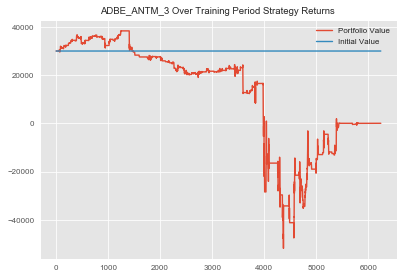

In [45]:
adbe_antm_3_historical=statarb(training_df['ADBE'],training_df['ANTM'],17,-2,2,17,adbe_test.iloc[0],adbe_test.iloc[-1])
adbe_antm_3_historical.create_spread()
adbe_antm_3_historical.generate_signals()

#notice that we are equally weighing our strategy
adbe_antm_3_historical.create_returns(30000,'ADBE_ANTM_3 Over Training Period')

Okay now that we've created our strategy, let's check our returns.

In [46]:
adbe_antm_3_historical_rets=adbe_antm_3_historical.portfolio['Returns']

In [949]:
#checking head of returns
adbe_antm_3_historical_rets.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Returns, dtype: float64

We will now repeat this process for our remaining pairs.

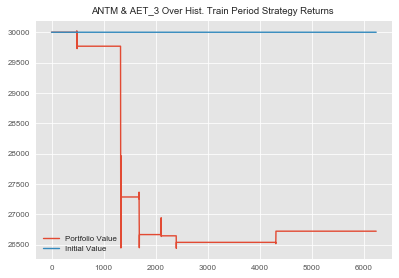

In [47]:
#ANTM_AET Bottom Up Historical Implementation
antm_aet_3_historical=statarb(training_df['ANTM'],training_df['AET'],6,-2,2,6,antm_test.iloc[0],antm_test.iloc[-1])
antm_aet_3_historical.create_spread()
antm_aet_3_historical.generate_signals()
antm_aet_3_historical.create_returns(30000,'ANTM & AET_3 Over Hist. Train Period')

Let's store our returns from the ANTM_AET training period in a variable

In [48]:
antm_aet_3_historical_rets=antm_aet_3_historical.portfolio['Returns']

Okay we finish up with our AET_ANTM pair.

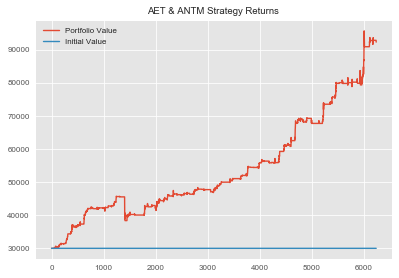

In [49]:
aet_antm_3_historical=statarb(training_df['AET'],training_df['ANTM'],12,-2,2,12,aet_test.iloc[0],aet_test.iloc[-1])
aet_antm_3_historical.create_spread()
aet_antm_3_historical.generate_signals()
aet_antm_3_historical.create_returns(30000,'AET & ANTM')

Let's store our AET_ANTM returns in a variable.

In [50]:
aet_antm_3_historical_rets=aet_antm_3_historical.portfolio['Returns']

In [959]:
#checking AET_ANTM returns over training period
aet_antm_3_historical_rets.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Returns, dtype: float64

### Step 3: Using Gaussian Mixture Model to  Identify Historical Regimes

We now have the returns of our StatArb strategies over our historical period. Our next task is to identify our historical regimes. Our goal is to identify the regimes in which our stratetgies have not performed well on a risk to reward basis and avoid these periods. To achieve this, we must 1) identify our historical regimes and 2) engineer features that can be used to predict these regimes. We can then augment our signal generator and thus optimize our portfolio from the microstructure level up.

We'll begin by splitting our returns data into an 80/20 train test split.

In [51]:
#splitting historical returns data
#ADBE_ANTM
#getting length of returns data
adbe_antm_3_rets_len=len(adbe_antm_3_historical_rets)
adbe_antm_3_rets_train=adbe_antm_3_historical_rets[0:4992]
adbe_antm_3_rets_test=adbe_antm_3_historical_rets[-1248:]

#ANTM_AET
#getting length of returns data
antm_aet_3_rets_len=len(antm_aet_3_historical_rets)
antm_aet_3_rets_train=antm_aet_3_historical_rets[0:4992]
antm_aet_3_rets_test=antm_aet_3_historical_rets[-1248:]

#AET_ANTM
#getting length of returns data
aet_antm_3_rets_len=len(aet_antm_3_historical_rets)
aet_antm_3_rets_train=aet_antm_3_historical_rets[0:4992]
aet_antm_3_rets_test=aet_antm_3_historical_rets[-1248:]

Now that we have created our train and test splits we're ready to identify our regimes. We'll start by training our GMM on our training period data, then we'll apply it to our testing period data. We'll create method that we can use for our GMM and Random Forests.

In [68]:
class gmm_randomForests(object):
    def __init__(self,historical_rets_train,historical_rets_test,base_portfolio_rets,gmm_components,df,base_portfolio_df,
                 internal_test_start,internal_test_end):

            '''
            PARAMETERS
            ##########
            The first 3 parameters should have already been sliced from the
            entire sample; ie specific dates parsed from dataframe that contains
            trade history, returns, and features; other features will be added
            later in development within the object
            
            historical_rets_train- the returns data over the historical period used to train on
                                this is the internal train of the internal 80/20 split;the 80%
                                of the total historical training set
                                
            historical_rets_test- retuns data for 20% of internal training test set
            
            base_portfolio_rets - this is our figurative live data;ie returns; 5/01/18-6/12/18 from either
                                Equally Weighted or Efficient Frontier Portfolios dependent upon implementation
                                of Bottom Up or SPO Framework
            
            ex. data over 01/04/18-04/30/18
            we would first split this 80/20
            the 80% is our training set
            the 20% is our testing set
            
            we would then do another split on our training set created above
            this is so that if we can better understand the historical
            regimes and recalibrate our models if necessary before actually
            predicting our 5/1/18-6/12/18 testing set
            
            in this ex. our gmm_training_train is 80% of the period 01/04/18-4/30/18
            our gmm_training_test is 20% of the period 01/04/18-4/30/18 and our 
            gmm_test_actual is 05/01/18-6/12/18
            
            gmm_components - type:int; for number of components for GMM
            
            df - the entire dataframe containing prior trading history; the dataframe from either Equally Weighted or 
                 Efficient Frontier Portfolios; Our Random Forests Implementation will take this dataframe created by
                 our statarb class(i.e. from the prior portfolios) and add our features to it. It will then use these 
                 features to predict the regimes of our test period. Recall that our Equally Weighted and Efficient 
                 Frontier Portfolios were constructed over our assessment period of 5/1/18 to 6/12/18. We will then
                 be able to store our predictions in a varible for our test period. These predictions will be passed 
                 into a new statarb object as a parameter and be used to create the Bottom Up and SPO Framework Portfolios.
            
            total_training_start- type: string; the beginning of the historical period for analysis; input as string
                                    from example above would be 2012
            
            total_training_end - type:string; the end of the historical period for analysis; input as string;
                                    from example above would be 2017
                                    
            base_portfolio_df - (i.e.adbe_antm.df,etc)Note: for the Bottom Up Implementation this df would be the Equally Weighted df but for the 
                            SPO Framework df this would be the df from the Efficient Frontier implementation
            
            internal_test_start- type:int; this is the testing period for the total training period; in the example,
                                this is the assessment period of 05/01/18-06/12/18; start thus is len(strategy_object)*.80
                                
                                
            internal_test_end - type:int; this is the end of the assessment period; ie. the 20% testing split
                                of the broader split...this value is -len(strategy_object)*.20...Note this value is 
                                is negative because we want the last 20% of the data
                                                    
                                The last two methods are created as such because our Equally Weighted and Efficient Frontier 
                                Portfolios are not indexed by dates but are indexed by a sequence of ints. This means 
                                that in a later method(i.e. Random Forests) we have to pass in the int value of the index
                                position we want to parse
            '''
            self.historical_rets_train=historical_rets_train
            self.historical_rets_test=historical_rets_test
            self.base_portfolio_rets=base_portfolio_rets
            self.gmm_components=gmm_components
            self.max_iter=300
            self.random_state=101
            self.df=df
            #self.total_training_start=total_training_start
            #self.total_training_end=total_training_end
            self.base_portfolio_df=base_portfolio_df
            self.internal_test_start=internal_test_start
            self.internal_test_end=internal_test_end
            #creating volatility
            self.volatility=self.historical_rets_train.rolling(window=5).std()
            self.negative_volatility=np.where(self.historical_rets_train<0,self.historical_rets_train.rolling(window=5).std(),0)
        
            
    def make_gmm(self):
        model_kwds=dict(n_components=self.gmm_components,max_iter=self.max_iter,n_init=100,random_state=self.random_state)
        
        gmm=GM(**model_kwds)
        
        return gmm
    
    def analyze_historical_regimes(self):
        #Creating a Gaussian Mixture Model
        self.gmm=self.make_gmm()
        
        #instantiating the XTrain as the gmm_training_train; (i.e. the 80% of total training period)
        self.gmm_XTrain=np.array(self.historical_rets_train).reshape(-1,1)
        
        #Fitting the GMM on the Training Set(note this is the internal training set within the broader training set)
        self.gmm.fit(self.gmm_XTrain.astype(int))
        
        #Making predictions on the historical period; ie. the gmm_training_train
        self.gmm_historical_predictions=self.gmm.predict(self.gmm_XTrain.astype(int))
        
        #Making Predictions on the gmm_training_test (i.e. the 20% of total training period;)
        self.gmm_XTest=np.array(self.historical_rets_test).reshape(-1,1)
        self.gmm_training_test_predictions=self.gmm.predict(self.gmm_XTest.astype(int))
        
        #Fitting the Model on ACTUAL data we want to Predict Regimes For
        self.gmm_Actual=np.array(self.base_portfolio_rets).reshape(-1,1)
        self.base_portfolio_predictions=self.gmm.predict(self.gmm_Actual)
        
        
        return

    def historical_regime_returns_volatility(self,plotTitle):
        self.plotTitle=plotTitle
        data=pd.DataFrame({'Volatility':self.volatility,'Regime':self.gmm_historical_predictions,'Returns':self.historical_rets_train})
        
        with plt.style.context(['classic','seaborn-paper']):
            fig,ax=plt.subplots(figsize=(15,10),nrows=1, ncols=2)
            
            left   =  0.125  # the left side of the subplots of the figure
            right  =  0.9    # the right side of the subplots of the figure
            bottom =  .125    # the bottom of the subplots of the figure
            top    =  0.9    # the top of the subplots of the figure 
            wspace =  .5     # the amount of width reserved for blank space between subplots
            hspace =  1.1    # the amount of height reserved for white space between subplots
            # function that adjusts subplots using the above paramters
            plt.subplots_adjust(
                left    =  left, 
                bottom  =  bottom, 
                right   =  right, 
                top     =  top, 
                wspace  =  wspace, 
                hspace  =  hspace
            )
            
            # The amount of space above titles
            y_title_margin = 2
            
            plt.suptitle(self.plotTitle, y = 1, fontsize=20)
            
            plt.subplot(121)
            sns.swarmplot(x='Regime',y='Volatility',data=data)#,ax=ax[0][0])
            plt.title('Regime to Volatility')
            
            plt.subplot(122)
            sns.swarmplot(x='Regime',y='Returns',data=data)#, ax=ax[0][1]) 
            plt.title('Regime to Returns')
            plt.tight_layout()
            plt.show()
            
            return

                
    def train_random_forests(self):
            #adding Features to the DataFrame
            #assumption is that this is the df 
            #over the entire period
            
            '''CAN UNCOMMENT THE SELF.VIX CODE TO INCLUDE VIX IN ANALYSIS..NOTE CHANGES TO PANDAS_DATAREADER API'''
            #getting vix to add as feature
            #self.VIX=pdr.get_data_yahoo('^VIX',start=self.total_training_start,end=self.total_training_end)

            #creating features
            #self.df['VIX']=self.VIX['Close']
            self.df['6 X Vol']=self.df['X'].rolling(window=6).std()
            self.df['6 Y Vol']=self.df['Y'].rolling(window=6).std()
            self.df['6 Spread Vol']=self.df['Spread'].rolling(window=6).std()
            self.df['6 Z-Score Vol']=self.df['Z-Score'].rolling(window=6).std()

            self.df['12 X Vol']=self.df['X'].rolling(window=12).std()
            self.df['12 Y Vol']=self.df['Y'].rolling(window=12).std()
            self.df['12 Spread Vol']=self.df['Spread'].rolling(window=12).std()
            self.df['12 Z-Score Vol']=self.df['Z-Score'].rolling(window=12).std()

            self.df['15 X Vol']=self.df['X'].rolling(window=15).std()
            self.df['15 Y Vol']=self.df['Y'].rolling(window=15).std()
            self.df['15 Spread Vol']=self.df['Spread'].rolling(window=15).std()
            self.df['15 Z-Score Vol']=self.df['Z-Score'].rolling(window=15).std()
            
            #adding features to our historical df
            #self.base_portfolio_df['VIX']=self.VIX['Close']
            self.base_portfolio_df['6 X Vol']=self.df['X'].rolling(window=6).std()
            self.base_portfolio_df['6 Y Vol']=self.df['Y'].rolling(window=6).std()
            self.base_portfolio_df['6 Spread Vol']=self.df['Spread'].rolling(window=6).std()
            self.base_portfolio_df['6 Z-Score Vol']=self.df['Z-Score'].rolling(window=6).std()

            self.base_portfolio_df['12 X Vol']=self.df['X'].rolling(window=12).std()
            self.base_portfolio_df['12 Y Vol']=self.df['Y'].rolling(window=12).std()
            self.base_portfolio_df['12 Spread Vol']=self.df['Spread'].rolling(window=12).std()
            self.base_portfolio_df['12 Z-Score Vol']=self.df['Z-Score'].rolling(window=12).std()

            self.base_portfolio_df['15 X Vol']=self.df['X'].rolling(window=15).std()
            self.base_portfolio_df['15 Y Vol']=self.df['Y'].rolling(window=15).std()
            self.base_portfolio_df['15 Spread Vol']=self.df['Spread'].rolling(window=15).std()
            self.base_portfolio_df['15 Z-Score Vol']=self.df['Z-Score'].rolling(window=15).std()


            #replacing na values
            self.df.fillna(0, inplace=True)
            #Creating X_Train for RF over the Historical Period; Will train
            #over Historical period, ie. self.historical_training_start/end
            #then predict 
            self.RF_X_TRAIN=self.df[0:4992][['6 X Vol','6 Y Vol','6 Spread Vol','6 Z-Score Vol','12 X Vol','12 Y Vol',
                                               '12 Spread Vol','12 Z-Score Vol','15 X Vol','15 Y Vol','15 Spread Vol','15 Z-Score Vol']]
            #dropping unnecessary columns from train data
            #self.RF_X_TRAIN.drop(['X','Y','Longs','Shorts','Exit','Long_Market','Short_Market'],inplace=True,axis=1)
            
            #setting Y_Train for the RF to the predictions of GMM over historical period
            self.RF_Y_TRAIN=self.gmm_historical_predictions

            #Creating X_Test for the RF; ie the gmm_training_test period
            #our features for RF
            #that haven't been seen by the model
            self.RF_X_TEST=self.base_portfolio_df[['6 X Vol','6 Y Vol','6 Spread Vol','6 Z-Score Vol','12 X Vol','12 Y Vol',
                                               '12 Spread Vol','12 Z-Score Vol','15 X Vol','15 Y Vol','15 Spread Vol','15 Z-Score Vol']]\
            
            #dropping unnecessary columns from train data
            #self.RF_X_TEST.drop(['X','Y','Longs','Shorts','Exit','Long_Market','Short_Market'],inplace=True,axis=1)

            #predictions for the x test over the internal testing period
            self.RF_Y_TEST=self.base_portfolio_predictions #regime predictions for base portfolio

            #build the RandomForest and check precision
            self.RF_MODEL=RF(n_estimators=100) #Recall imported RandomForestsClassifier as RF
            
            #training the random forests model on assessment period data
            self.RF_MODEL.fit(self.RF_X_TRAIN.fillna(0),self.RF_Y_TRAIN)
            
            #Making predictions for base portfolio period
            self.RF_BASE_PORTFOLIO_PREDICTIONS=self.RF_MODEL.predict(self.RF_X_TEST.fillna(0))

            #Checking Precision of Predictions
            #print(confusion_matrix(self.RF_Y_TEST,self.RF_BASE_PORTFOLIO_PREDICTIONS))
            #print('\n')
            #print(classification_report(self.RF_Y_TEST,self.RF_BASE_PORTFOLIO_PREDICTIONS))


                
            return


Okay. Though I've heavily commented the above object, I'd like to reiterate the most important inputs to our gmm_randomForests method.

The most critical parameters are 1)gmm_training_train, 2)gmm_training_test, 3)gmm_test_actual, and 4)df. gmm_training_train is the 80% split of the historical period returns we created earlier. gmm_training_test is the 20% slice of the historical period returns we created. gmm_test actual is are the returns from either our Equally Weighted or Efficient Frontier Portfolios. The Bottom Up Optimization builds on the Equally Weighted Portfolio in that though it offers an optimization technique, the allocations remain equally weighted. This means that we can use the returns from our Equally Weighted Portfolio, predict the regimes, and create a new statarb object that uses the regimes(i.e. Bottom Up Optimization).

The same logic is true for our Efficient Frontier Portfolio. The SPO Framework builds on the Efficient Frontier Portfolio. Thus when we design our SPO Framework Portfolio, we will get the regime predictions from our Efficient Frontier implementation. We will then create a new statarb object that takes those regime predictions in as a parameter and use it to create our SPO Framework Portfolio.

An important thing to keep mind is that our GMM and Random Forests models are trained using our historical data. So when we provide the models with data from our Efficient Frontier and Equally Weighted Portfolios, it's data that our models have not seen. This was the purpose of separating our data.

#### ADBE_ANTM GMM Implementation

We'll begin with our first pair. Let's initialize our method.

In [53]:
#initializing GMM Random Forests method
#passing in the 1)returns for 80% of the training period(i.e.01/04/18-04/30/18),2)returns for 20% of the training period(i.e.01/04/18-04/30/18)
#3) Returns for actual or overall test period; (i.e. 05/01/18-06/12/18) for Equally Weighted, 4) count for GMMs, 
#5)Dataframe for Equally Weighted, 6)
adbe_antm_gmm_rf=gmm_randomForests(adbe_antm_3_rets_train,adbe_antm_3_rets_test,adbe_antm.portfolio['Returns'],5,
                                 adbe_antm_3_historical.df, adbe_antm.df,1871,-468)

Now that we have initiated our object, let's use it to get the regimes of our adbe_antm pair. Note these are based on our historical data.

In [54]:
#calling our analyze historical regimes method
adbe_antm_gmm_rf.analyze_historical_regimes()

We can now plot our regimes using our historical_regime_returns_volatility method.

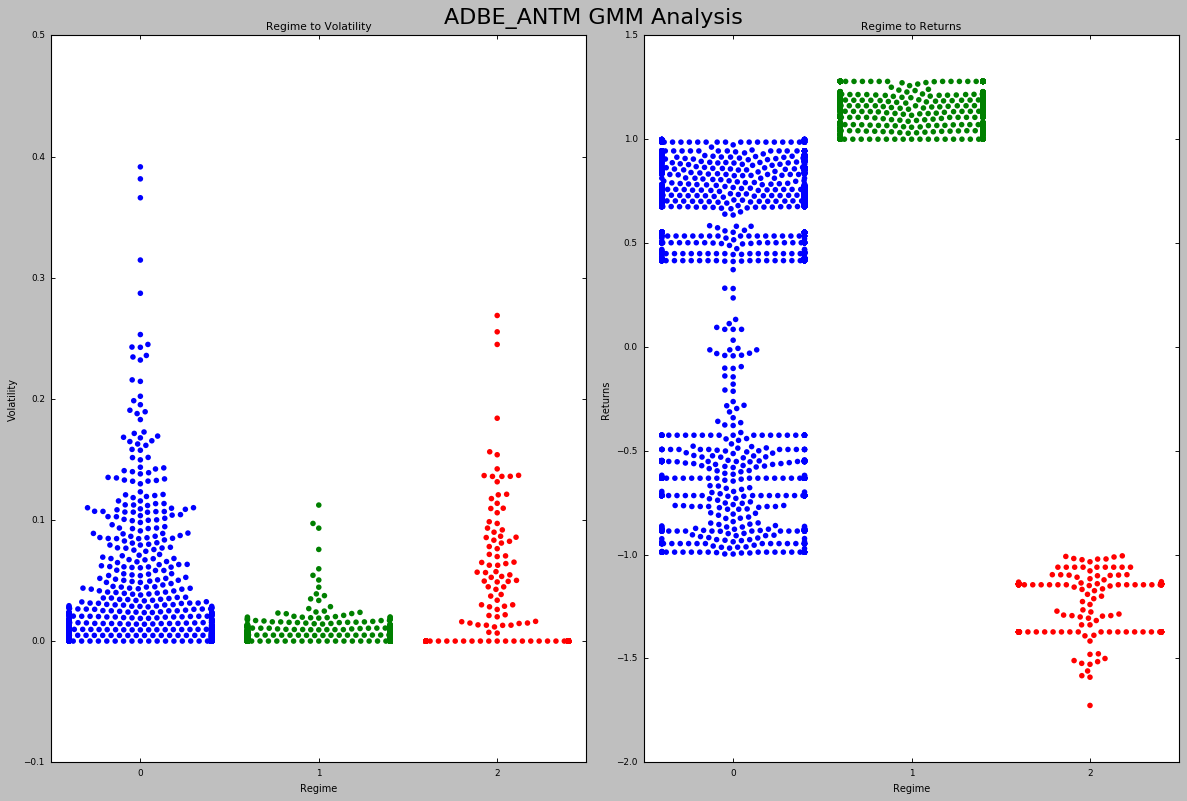

In [1082]:
#Note this method takes in a string to title our plot
adbe_antm_gmm_rf.historical_regime_returns_volatility('ADBE_ANTM GMM Analysis')

From looking at the above plot, we can see that the regime most favorable for our strategy is Regime 1. This regime has the lowest relative volatility but also yields the highest return. We will make a note of this and incorporate this into our updated statarb implemention. 

One thing to note is that we created these regimes over our historical or training period. Recall we performed an 80/20 split on our data. This means that any one of these regimes could be the actual regime in which our observations fall in over the period 05/01/18 to 06/21/18. In practice the idea would be to look at a historical period(i.e. trailing 3 months) and apply the analysis to the current one month. We would update and perform this analysis at the end of each month.

Let's do the same for the remainder of our pairs.

#### ANTM_AET GMM Implementation

In [73]:
#initializing object
antm_aet_gmm_rf=gmm_randomForests(antm_aet_3_rets_train,antm_aet_3_rets_test,antm_aet.portfolio['Returns'],5,
                                 antm_aet_3_historical.df, antm_aet.df,1871,-468)

In [74]:
#calling our analyze historical regimes method
antm_aet_gmm_rf.analyze_historical_regimes()

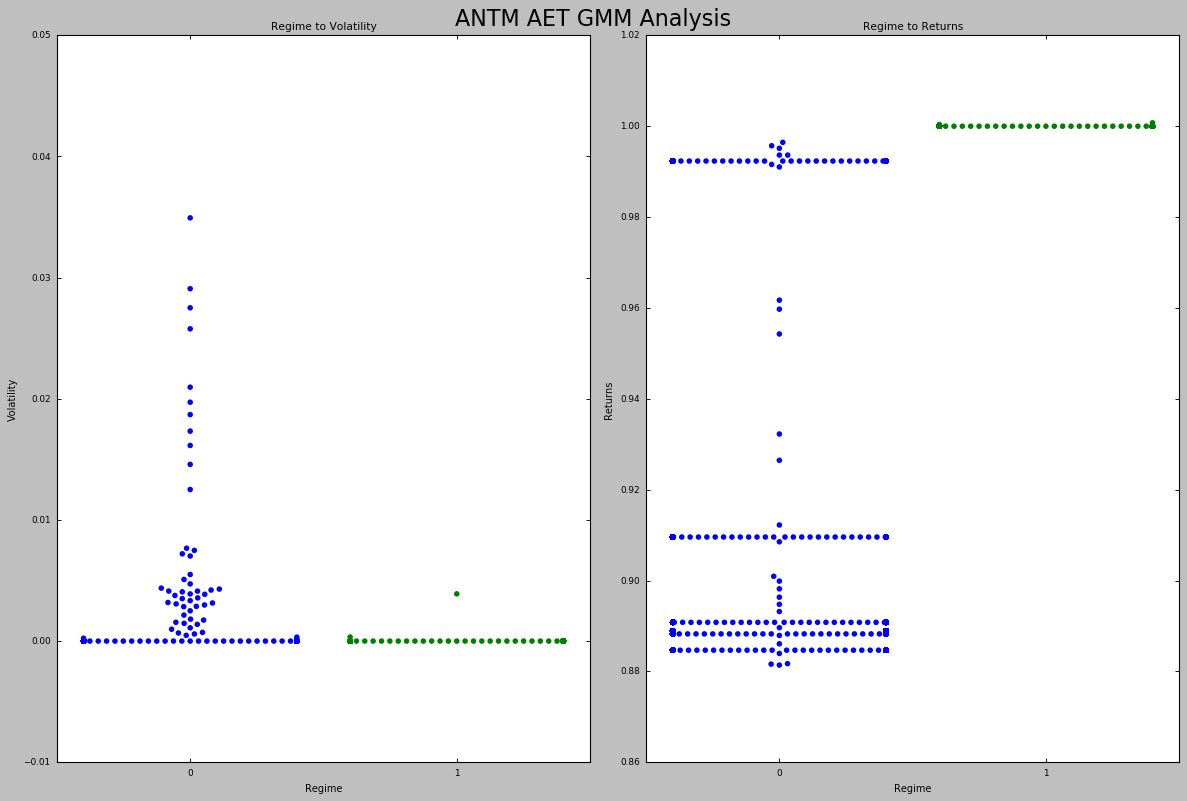

In [62]:
#plotting regime returns and volatility...Pass in String for Title of Plot
antm_aet_gmm_rf.historical_regime_returns_volatility('ANTM AET GMM Analysis')

Okay we can see that Regime 1 appears to offer the best risk/reward tradeoff for our ANTM_AET relationship. Our returns remain positive throughout the relative volatility distribution but it's more desirable to get equivalent returns with less volatility.

#### AET_ANTM GMM Implemenation

In [75]:
#initializing object
aet_antm_gmm_rf=gmm_randomForests(aet_antm_3_rets_train,aet_antm_3_rets_test,aet_antm.portfolio['Returns'],5,
                                 aet_antm_3_historical.df, aet_antm.df,1871,-468)

In [76]:
#calling our analyze historical regimes method
aet_antm_gmm_rf.analyze_historical_regimes()

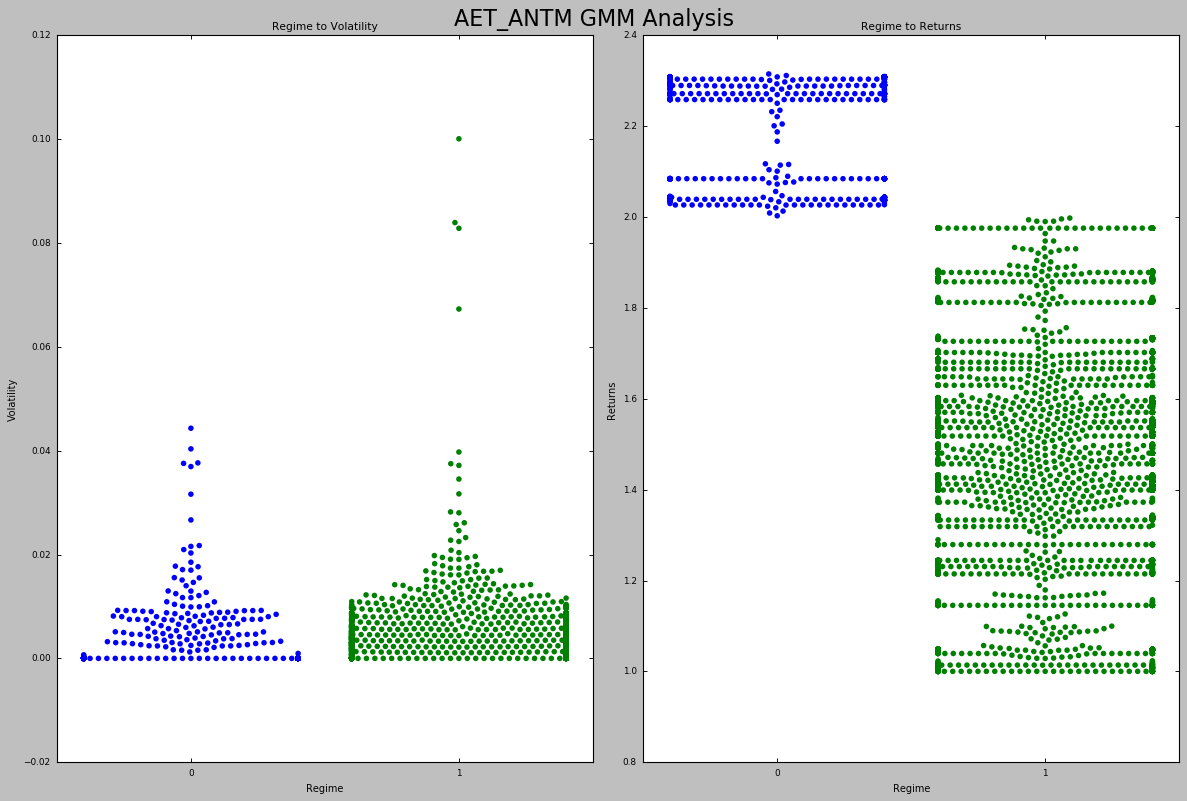

In [65]:
#plotting regime returns and volatility...Pass in String for Title of Plot
aet_antm_gmm_rf.historical_regime_returns_volatility('AET_ANTM GMM Analysis')

We can see once again that despite the level of volatility, our returns are still positive. However, one thing that we can note from the above plots is that for the most part the levels of volatility are similar between Regime 0 and Regime 1. However, we do see some bursts in volatility within Regime 1 and a signicant portion of our historical returns, though they were positive, were less than those of Regime 0, of which didn't display any significant burts.

We won't make any changes to the implementation of this strategy in this illustration but further analysis could be conducted to determine the sign of returns given those volatility bursts and the same could be used to augment the strategy.

Let's begin using our Random Forests to predict our regimes and update our StatArb strategy by using our regime predictions to answer the above question.

### Step 4: Training Random Forests to Predict Regimes

Now that we have completed our regime analysis we can use our Random Forests to predict the regimes of our assessment period. Recall that we passed in the dataframe from our Equally Weighted Portfolio created by our adbe_antm object. We can call our train_random_forests method on our gmm_rf objects to train our Random Forests using the features we selected. We can then create a variable to hold our predictions. These predictions will then be passed into our new statarb object and used to generate our Bottom Up Portfolio.

#### ADBE_ANTM Random Forests Implementation.

In [89]:
#calling the train_random_forests method on our adbe_antm_gmm_rf object
adbe_antm_gmm_rf.train_random_forests()

[[   0    0]
 [ 895 1444]]


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.62      0.76      2339

avg / total       1.00      0.62      0.76      2339



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Let's ensure that we understand what we've achieved thus far. Recall that we created variables to hold the returns of our training period 01/04/18 to 04/30/18. We used the training_df dataframe to provide the historical data and applied our StatArb strategy to it. We then split that training period returns, of which we stored in variables, into an 80% training and 20% testing subset. The period of 05/01/18 to 06/12/18 was our hypothetical live market data and is the period in which we created our Equally Weighted and Efficient Frontier Portfolios.

Our objective with the Bottom Up Portfolio was to build upon our Equally Weighted Portfolio by optimizing using the features we engineered to predict the regime that our strategy was in based on regimes seen historically. To achieve this we needed to train our Gaussian Mixture Model using our training over the period 01/04/18 to 04/30/18 and use our GMM Model to predict the regimes from our 05/01/18 to 06/12/18 period. We could then use our regimes from the 01/04/18 to 04/30/18 period as labels and the features that we engineered as parameters for our Random Forest training.

Once we trained our Random Forests we were then able to pass in our features from over the 05/01/18 to 06/12/18 period and use it to predict the regimes. To test our accuracy we compared these results to the actual regimes created by our Gaussian Mixture Model over the 05/01/18 to 06/12/18 period.

Our results showed that our Random Forests had perfect precision. This is because that over our hypothetical live trading period, our observations came from the same distribution, of which can be seen from our classification report above. We can now create a variable to store our regime predictions from our hypothetical live trading period (i.e. 05/01/18 to 06/12/18) and feed these into an updated statarb implementation and see how our results would change. We will tell our updated statarb strategy which regimes to avoid using the chart we created earlier showing our returns and volatility levels per regime.

Not that we've gotten a better understanding of our process, in future implementations we'll comment out the confusion matrix and classication reports so that we won't actually know which regimes our data fell into over our hypothetical live trading period. We'll solely rely upon our analysis of the volatiltiy and returns characteristics of our regimes and feed this information into our strategy implementation.

Let's store our regime preditions for our ADBE_ANTM pair into a varible that we can use for our updated  StatArb implementation.

In [66]:
adbe_antm_regime_predictions=adbe_antm_gmm_rf.base_portfolio_predictions

#### ANTM_AET Random Forests Implementation

In [71]:
#calling the train_random_forests method on our antm_aet_gmm_rf object
antm_aet_gmm_rf.train_random_forests()

Okay. Let's now store our regime predictions in a variable.

In [72]:
antm_aet_regime_predictions=antm_aet_gmm_rf.base_portfolio_predictions

#### AET_ANTM Random Forests Implementation

In [77]:
#calling the train_random_forests method on our antm_aet_gmm_rf object
aet_antm_gmm_rf.train_random_forests()

We'll now store our predictions in a variable.

In [78]:
aet_antm_regime_predictions=aet_antm_gmm_rf.base_portfolio_predictions

We can now use these regime predictions to create our updated strategies and compose our Bottom Up Portfolio.

### Step 5: Using the Model's Predictions in Strategy Development

We'll begin by creating an updated version of our statarb class that will allow us to pass in our regime predictions.

In [197]:
class statarb_update(object):
     #np.seterr(divide='ignore',invalid='ignore')
    
     def __init__(self,df1, df2, ptype,ma,floor, ceiling,beta_lookback,start,end,regimePredictions,p2Objective,avoid1=0,target1=0,
                  exit_zscore=0):
        #setting the attributes of the data cleaning object
        self.df1=df1 #the complete dataframe of X
        self.df2=df2 # the comlete dataframe of Y
        self.df=pd.DataFrame(index=df1.index) #creates a new dataframe in the create_spread method
        self.ptype=ptype #the portfolio type 1= standard implementation 2=machine learning implementation
        self.ma=ma# the moving average period for the model
        self.floor=floor #the buy threshold for the z-score
        self.ceiling=ceiling #the sell threshold for the z-score
        self.Close='Close Long'  #used as close signal for longs
        self.Cover='Cover Short' #used as close signal for shorts
        self.exit_zscore=exit_zscore  #the z-score
        self.beta_lookback=beta_lookback #the lookback of beta for hedge ratio
        self.start=start #the beginning of test period as a string
        self.end=end    # the end of test period as a string
        self.regimePredictions=regimePredictions.reshape(-1,1)  #the regime predictions from GMM for p2=2 implementation
        self.avoid1=avoid1 #the regime to avoid
        self.target1=target1 #the regime to target
        self.p2Objective=p2Objective #type:string;#the objective of p2 implementation; can be 'Avoid','Target',or 'None'; 
                                
        
     #create price spread
     def create_spread(self):
            if self.ptype==1:
                #setting the new dataframe values for x and y of the closing 
                #prices of the two dataframes passed in
                self.df['X']=self.df1[' Close']
                self.df['Y']=self.df2[' Close']

                #calculating the beta of the pairs             
                self.ols=linregress(self.df['Y'],self.df['X'])

                #setting the hedge ratio
                self.df['Hedge Ratio']=self.ols[0]

                self.df['Spread']=self.df['Y']-(self.df['Hedge Ratio']*self.df['X'])

            if self.ptype==2:
                #setting the new dataframe values for x and y of the closing 
                #prices of the two dataframes passed in
                self.df['X']=self.df1[' Close']
                self.df['Y']=self.df2[' Close']


                #calculating the beta of the pairs                
                self.ols=linregress(self.df['Y'],self.df['X'])

                #setting the hedge ratio
                self.df['Hedge Ratio']=self.ols[0]
                #creating spread
                self.df['Spread']=self.df['Y']-(self.df['Hedge Ratio']*self.df['X'])
                
                #creating the z-score
                self.df['Z-Score']=(self.df['Spread']-self.df['Spread'].rolling(window=self.ma).mean())/self.df['Spread'].rolling(window=self.ma).std()
                
                
                #Creating the features columns
                self.df['6 X Vol']=self.df['X'].rolling(window=6).std()
                self.df['6 Y Vol']=self.df['Y'].rolling(window=6).std()
                self.df['6 Spread Vol']=self.df['Spread'].rolling(window=6).std()
                self.df['6 Z-Score Vol']=self.df['Z-Score'].rolling(window=6).std()

                self.df['12 X Vol']=self.df['X'].rolling(window=12).std()
                self.df['12 Y Vol']=self.df['Y'].rolling(window=12).std()
                self.df['12 Spread Vol']=self.df['Spread'].rolling(window=12).std()
                self.df['12 Z-Score Vol']=self.df['Z-Score'].rolling(window=12).std()

                self.df['15 X Vol']=self.df['X'].rolling(window=15).std()
                self.df['15 Y Vol']=self.df['Y'].rolling(window=15).std()
                self.df['15 Spread Vol']=self.df['Spread'].rolling(window=15).std()
                self.df['15 Z-Score Vol']=self.df['Z-Score'].rolling(window=15).std()
                #Creating the Regime Prediction Column
                self.df['Regime']=0
                self.df['Regime']=self.regimePredictions.astype(int)
                

                

            return
    
            
     def generate_signals(self):
            if self.ptype==1:
            
                #creating the z-score
                self.df['Z-Score']=(self.df['Spread']-self.df['Spread'].rolling(window=self.ma).mean())/self.df['Spread'].rolling(window=self.ma).std()
                
                #prior z-score
                self.df['Prior Z-Score']=self.df['Z-Score'].shift(1)
                
                #Creating Buy and Sell Signals; when to be long, short, exit
                
                #self.df['Signal']=np.where(self.df['Z-Score']<=self.floor,'BUY', np.where(self.df['Z-Score']>=self.ceiling,'SELL','FLAT'))
                #self.df['Prior Signal']=self.df['Signal'].shift(1)
                
                self.df['Longs']=(self.df['Z-Score']<=self.floor)*1.0 #buy the spread
                self.df['Shorts']=(self.df['Z-Score']>=self.ceiling)*1.0 #short the spread
                self.df['Exit']=(self.df['Z-Score']<=self.exit_zscore)*1.0
                
                #tracking positions via for loop implementation
                self.df['Long_Market']=0.0
                self.df['Short_Market']=0.0
                
                #Setting Variables to track whether or not to be long while iterating over df
                self.long_market=0
                self.short_market=0
                
                #Determining when to trade
                for i,value in enumerate(self.df.iterrows()):
                    #Calculate logns
                    if value[1]['Longs']==1.0:
                        self.long_market=1
                        
                    if value[1]['Shorts']==1.0:
                        self.short_market=1
                        
                    if value[1]['Exit']==1.0:
                        
                        self.long_market=0
                        self.short_market=0
                        
                    self.df.iloc[i]['Long_Market']=self.long_market
                    self.df.iloc[i]['Short_Market']=self.short_market
  
                    
            if self.ptype==2:        
                
                
                
                self.df['Longs']=(self.df['Z-Score']<=self.floor)*1.0 #buy the spread
                self.df['Shorts']=(self.df['Z-Score']>=self.ceiling)*1.0 #short the spread
                self.df['Exit']=(self.df['Z-Score']<=self.exit_zscore)*1.0
                
                #tracking positions via for loop implementation
                self.df['Long_Market']=0.0
                self.df['Short_Market']=0.0
                
                #Setting Variables to track whether or not to be long while iterating over df
                self.long_market=0
                self.short_market=0
                
                #Determining when to trade
                for i,value in enumerate(self.df.iterrows()):
                    if self.p2Objective=='Avoid':
                        if value[1]['Regime']!= self.avoid1:
                            #Calculate longs
                            if value[1]['Longs']==1.0:
                                self.long_market=1

                            if value[1]['Shorts']==1.0:
                                self.short_market=1

                            if value[1]['Exit']==1.0:

                                self.long_market=0
                                self.short_market=0
                                
                        self.df.iloc[i]['Long_Market']=value[1]['Longs']#self.long_market
                        self.df.iloc[i]['Short_Market']=value[1]['Shorts']#self.short_market
                                
                    elif self.p2Objective=='Target':
                        if value[1]['Regime']==self.target1:
                            #Calculate longs
                            if value[1]['Longs']==1.0:
                                self.long_market=1

                            if value[1]['Shorts']==1.0:
                                self.short_market=1

                            if value[1]['Exit']==1.0:

                                self.long_market=0
                                self.short_market=0
                        
                        self.df.iloc[i]['Long_Market']=value[1]['Longs']#self.long_market
                        self.df.iloc[i]['Short_Market']=value[1]['Shorts']#self.short_market
                                
                    elif self.p2Objective=='None':
                        
                        #Calculate longs
                        if value[1]['Longs']==1.0:
                            self.long_market=1
                        #Calculate Shorts
                        if value[1]['Shorts']==1.0:
                            self.short_market=1

                        if value[1]['Exit']==1.0:

                            self.long_market=0
                            self.short_market=0

                        self.df.iloc[i]['Long_Market']=value[1]['Longs']#self.long_market
                        self.df.iloc[i]['Short_Market']=value[1]['Shorts']#self.short_market
  
                
                
               
            return self.df                    
        
     def create_returns(self, allocation,pair_number):
        if self.ptype==1:         
            '''
            PARAMETERS
            ##########
            allocation - the amount of capital alotted for pair
            pair_number - string to annotate the plots

            '''
            self.allocation=allocation 
            self.pair=pair_number

            self.portfolio=pd.DataFrame(index=self.df.index)
            self.portfolio['Positions']=self.df['Long_Market']-self.df['Short_Market']
            self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
            self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
            self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']


            #creating a percentage return stream
            self.portfolio['Returns']=self.portfolio['Total'].pct_change()
            self.portfolio['Returns'].fillna(0.0,inplace=True)
            self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
            self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)


            #calculating metrics
            self.mu=(self.portfolio['Returns'].mean())
            self.sigma=(self.portfolio['Returns'].std())
            self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
            self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
            self.wins=self.portfolio['Win'].sum()
            self.losses=self.portfolio['Loss'].sum()
            self.total_trades=self.wins+self.losses
            #calculating sharpe ratio with interest rate of 
            #interest_rate_assumption=0.75
            #self.sharp=(self.mu-interest_rate_assumption)/self.sigma

            #win loss ratio; 
            self.win_loss_ratio=(self.wins/self.losses)

            #probability of win
            self.prob_of_win=(self.wins/self.total_trades)
            #probability of loss
            self.prob_of_loss=(self.losses/self.total_trades)

            #average return of wins
            self.avg_win_return=(self.portfolio['Returns']>0).mean()
            #average returns of losses
            self.avg_loss_return=(self.portfolio['Returns']<0).mean()
            #calculating payout ratio
            self.payout_ratio=(self.avg_win_return/self.avg_loss_return)

            #calculate equity curve
            self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
            self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
            self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
            self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
            self.portfolio['Initial Value']=self.allocation

            with plt.style.context(['ggplot','seaborn-paper']):
                #Plotting Portfolio Value   
                plt.plot(self.portfolio['Portfolio Value'])
                plt.plot(self.portfolio['Initial Value'])
                plt.title('%s Strategy Returns '%(self.pair))
                plt.legend(loc=0)
                plt.show()

    
                
        
        if self.ptype==2:
            '''
            PARAMETERS
            ##########
            allocation - the amount of capital alotted for pair
            pair_number - string to annotate the plots

            '''
            self.allocation=allocation 
            self.pair=pair_number

            self.portfolio=pd.DataFrame(index=self.df.index)
            self.portfolio['Positions']=self.df['Longs']-self.df['Shorts']
            self.portfolio['X']=-1.0*self.df['X']*self.portfolio['Positions']
            self.portfolio['Y']=self.df['Y']*self.portfolio['Positions']
            self.portfolio['Total']=self.portfolio['X']+self.portfolio['Y']
            
            self.portfolio.fillna(0.0,inplace=True)


            #creating a percentage return stream
            self.portfolio['Returns']=self.portfolio['Total'].pct_change()
            self.portfolio['Returns'].fillna(0.0,inplace=True)
            self.portfolio['Returns'].replace([np.inf,-np.inf],0.0,inplace=True)
            self.portfolio['Returns'].replace(-1.0,0.0,inplace=True)


            #calculating metrics
            self.mu=(self.portfolio['Returns'].mean())
            self.sigma=(self.portfolio['Returns'].std())
            self.portfolio['Win']=np.where(self.portfolio['Returns']>0,1,0)
            self.portfolio['Loss']=np.where(self.portfolio['Returns']<0,1,0)
            self.wins=self.portfolio['Win'].sum()
            self.losses=self.portfolio['Loss'].sum()
            self.total_trades=self.wins+self.losses
            #calculating sharpe ratio with interest rate of 
            #interest_rate_assumption=0.75
            #self.sharp=(self.mu-interest_rate_assumption)/self.sigma

            #win loss ratio; 
            self.win_loss_ratio=(self.wins/self.losses)

            #probability of win
            self.prob_of_win=(self.wins/self.total_trades)
            #probability of loss
            self.prob_of_loss=(self.losses/self.total_trades)

            #average return of wins
            self.avg_win_return=(self.portfolio['Returns']>0).mean()
            #average returns of losses
            self.avg_loss_return=(self.portfolio['Returns']<0).mean()
            #calculating payout ratio
            self.payout_ratio=(self.avg_win_return/self.avg_loss_return)

            #calculate equity curve
            self.portfolio['Returns']=(self.portfolio['Returns']+1.0).cumprod()
            self.portfolio['Trade Returns']=(self.portfolio['Total'].pct_change()) #non cumulative Returns
            self.portfolio['Portfolio Value']=(self.allocation*self.portfolio['Returns'])
            self.portfolio['Portfolio Returns']=self.portfolio['Portfolio Value'].pct_change()
            self.portfolio['Initial Value']=self.allocation

            with plt.style.context(['ggplot','seaborn-paper']):
                #Plotting Portfolio Value   
                plt.plot(self.portfolio['Portfolio Value'])
                plt.plot(self.portfolio['Initial Value'])
                plt.title('%s Strategy Returns '%(self.pair))
                plt.legend(loc=0)
                plt.show()



                
        return #self.portfolio['Portfolio Value'].plot()


Let's now use our updated statarb class to create our strategies.

#### ADBE_ANTM Bottom Up Implementation

In [198]:
#creating instance of updated statarb strategy
adbe_antm_bottom_up=statarb_update(adbe_test, antm_test, 2,17,-2, 2,17,'05/01/18','06/12/18',adbe_antm_regime_predictions,'Target',avoid1=0,target1=1,
                  exit_zscore=0)

In the above code block, we pass in our standard parameters with the exception of new fields, namely a 'Target', target1, avoid1, and regime predictions. The Target parameter is our selection for our p2objective. It simply means that we are seeking to target a specific regime. If we set this parameter to 'Avoid', we would simply initialize the avoid1 parameter as the regime we wanted to avoid. Given that we set this parameter to 'Target', we simply initialize the target 1 parameter to the regime we would like to target.

Recall that we identified our historical regimes and trained our Random Forests to predict these regimes using the features we engineered. We later applied our Random Forests model to our testing period and stored the regime predictions in a variable. We now pass those predictions in here and use them to update our signal generator based on our analysis of our historical regime. Let's finish this implementation bny calling our remaining methods on our object.

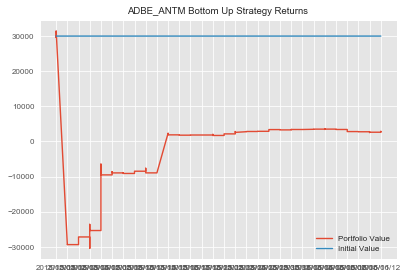

In [265]:
#creating spread
adbe_antm_bottom_up.create_spread()
#generating signals
adbe_antm_bottom_up.generate_signals()
#getting performance
#notice that we are passing in our equal weight amount here
adbe_antm_bottom_up.create_returns(30000,'ADBE_ANTM Bottom Up')

#### ANTM_AET Bottom Up Implementation

In [266]:
#creating instance of updated statarb strategy
antm_aet_bottom_up=statarb_update(antm_test, aet_test, 2,6,-2, 2,6,'05/01/18','06/12/18',antm_aet_regime_predictions,'Target',avoid1=0,target1=1,
                  exit_zscore=0) 

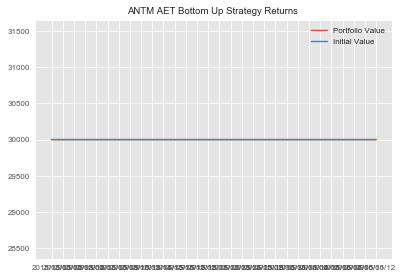

In [267]:
#creating spread
antm_aet_bottom_up.create_spread()
#generating signals
antm_aet_bottom_up.generate_signals()
#getting performance
#notice that we are passing in our equal weight amount here
antm_aet_bottom_up.create_returns(30000,'ANTM AET Bottom Up')

After using our analysis of the historical regimes that our strategy fell within and updating our statarb implementation to avoid Regime 0, we can see that our ANTM_AET implementation didn't trade over our test period. This is an indication that observations fell within Regime 0 over this period.

#### AET_ANTM Bottom Up Implementation

In [213]:
#creating instance of updated statarb strategy
aet_antm_bottom_up=statarb_update(aet_test, antm_test, 1,12,-2, 2,12,'05/01/18','06/12/18',aet_antm_regime_predictions,'Avoid',avoid1=1,target1=0,
                  exit_zscore=0)

Note that in our AET_ANTM implementation we chose not to avoid or target any specific regime. Thus, in the third parameter, denoting portfolio type, we passed in 1 which is our original implementation.

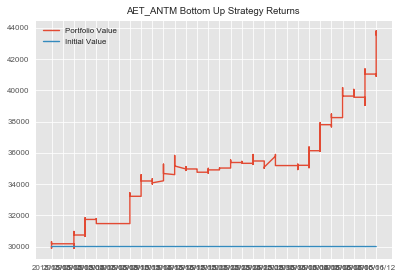

In [214]:
#creating spread
aet_antm_bottom_up.create_spread()
#generating signals
aet_antm_bottom_up.generate_signals()
#getting performance
#notice that we are passing in our equal weight amount here
aet_antm_bottom_up.create_returns(30000,'AET_ANTM Bottom Up')

### Step 6: Getting Performance Metrics

We can now aggregate our strategies to form our Bottom Up Portfolio and store our Sharpe Ratio in a variable for later use.

In [215]:
#creating dataframe for Bottom Up Portfolio
bottom_up_portfolio=pd.DataFrame()
bottom_up_portfolio['ADBE_ANTM']=adbe_antm_bottom_up.portfolio['Portfolio Value']
bottom_up_portfolio['AET_ANTM']=aet_antm_bottom_up.portfolio['Portfolio Value']
bottom_up_portfolio['ANTM_AET']=antm_aet_bottom_up.portfolio['Portfolio Value']
bottom_up_portfolio['Cash']=10000
bottom_up_portfolio['Total Portfolio Value']=bottom_up_portfolio['ADBE_ANTM']+bottom_up_portfolio['ANTM_AET']+bottom_up_portfolio['AET_ANTM']+bottom_up_portfolio['Cash']


We can now add a column to hold the returns of our Bottom Up Portfolio.

In [216]:
#adding returns column to Bottom Up Dataframe
bottom_up_portfolio['Returns']=np.log(bottom_up_portfolio['Total Portfolio Value']/bottom_up_portfolio['Total Portfolio Value'].shift(1))

Let's now plot the equity curve of our Bottom Up Portfolio.

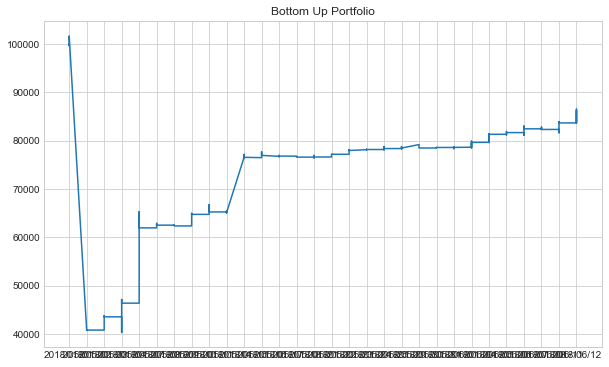

In [217]:
plt.figure(figsize=(10,6))
plt.plot(bottom_up_portfolio['Total Portfolio Value'])
plt.title('Bottom Up Portfolio')
plt.show()

Let's wrap up our Bottom Up Portfolio by creating and storing our Sharpe in a variable for later use.

In [218]:
bottom_up_portfolio_mu=bottom_up_portfolio['Returns'].mean()
bottom_up_portfolio_sigma=bottom_up_portfolio['Returns'].std()

#recall that we initialized our interest assumption earlier
bottom_up_portfolio_sharpe=(bottom_up_portfolio_mu-rate)/bottom_up_portfolio_sigma

# Portfolio Construction: SPO Framework

The SPO Framework combines the logic behind the Efficient Frontier, or top down optimization, with that of the bottom up optimization portfolio. Here we repeat the process used to create the bottom up portfolio except instead of equally weighing our strategies, we weight them according to the weights found when we created the Efficient Frontier.

Recall that our Efficient Frontier Analysis gave our ANTM_AET pair a weight of 0. This is congruent with what we saw when implementing our Bottom Up Portfolio. Thus, we'll create our SPO Implementations on our ADBE_ANTM and AET_ANTM pairs using our Efficient Frontier Weights and regime predictions found during our Bottom Up implementation.

#### ADBE_ANTM SPO Framework Implementation

In [268]:
#creating instance of updated statarb strategy
adbe_antm_spo=statarb_update(adbe_test, antm_test, 2,17,-2, 2,17,'05/01/18','06/12/18',adbe_antm_regime_predictions,'Target',avoid1=0,target1=1,
                  exit_zscore=0)

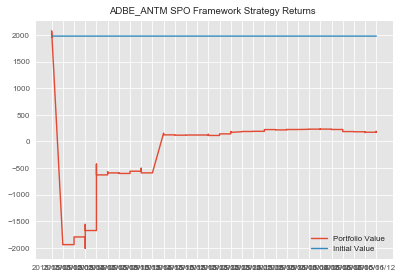

In [269]:
#creating spread
adbe_antm_spo.create_spread()
#generating signals
adbe_antm_spo.generate_signals()
#getting performance
#notice that we are passing in our weight from our efficient frontier analysis here
adbe_antm_spo.create_returns(adbe_antm_allocation,'ADBE_ANTM SPO Framework')

Let's repeat this process for our AET_ANTM implementation.

#### AET_ANTM SPO Framework Implementation

In [222]:
#creating instance of updated statarb strategy
aet_antm_spo=statarb_update(aet_test, antm_test, 1,12,-2, 2,12,'05/01/18','06/12/18',aet_antm_regime_predictions,'Avoid',avoid1=1,target1=0,
                  exit_zscore=0)

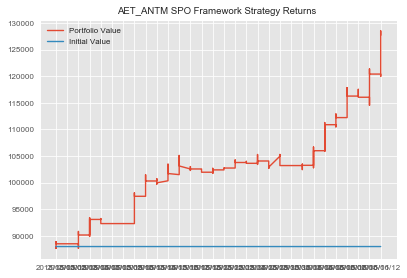

In [223]:
#creating spread
aet_antm_spo.create_spread()
#generating signals
aet_antm_spo.generate_signals()
#getting performance
#notice that we are passing in our efficient frontier weight amount here
aet_antm_spo.create_returns(aet_antm_allocation,'AET_ANTM SPO Framework')

#### We Can Now Compose Our SPO Framework Portfolio

In [224]:
#creating dataframe for SPO Portfolio
spo_portfolio=pd.DataFrame()
spo_portfolio['ADBE_ANTM']=adbe_antm_spo.portfolio['Portfolio Value']
spo_portfolio['AET_ANTM']=aet_antm_spo.portfolio['Portfolio Value']
spo_portfolio['Cash']=10000
spo_portfolio['Total Portfolio Value']=spo_portfolio['ADBE_ANTM']+spo_portfolio['AET_ANTM']+spo_portfolio['Cash']


#### Let's Now Compute the Returns of Our SPO Framework Portfolio

In [226]:
#adding returns column to SPO Portfolio dataframe
spo_portfolio['Returns']=np.log(spo_portfolio['Total Portfolio Value']/spo_portfolio['Total Portfolio Value'].shift(1))

In [227]:
spo_portfolio_mu=spo_portfolio['Returns'].mean()
spo_portfolio_sigma=spo_portfolio['Returns'].std()

#recall that we initialized our interest assumption earlier
spo_portfolio_sharpe=(spo_portfolio_mu-rate)/spo_portfolio_sigma

#### Let's Plot the Equity Curve of Our SPO Portfolio

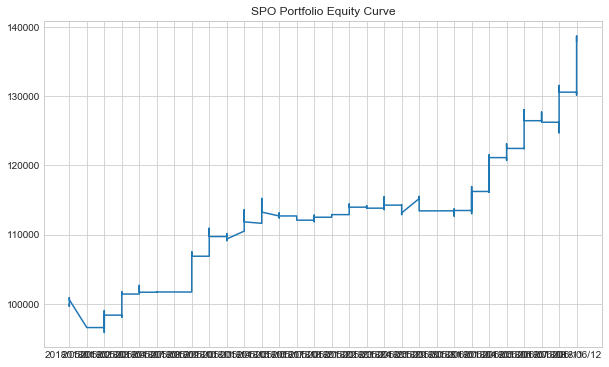

In [236]:
plt.figure(figsize=(10,6))
plt.plot(spo_portfolio['Total Portfolio Value'])
plt.title('SPO Portfolio Equity Curve')
plt.show()

We can now compare the Sharpe Ratios of each of our portfolios.

# Relative Portfolio Performance Assessment

Whew! We can now create a dataframe to hold our Sharpe ratios and compare our results. Let's create the variables that we use to create our dataframe.

In [229]:
#list to hold portfolio names
names=['Equally Weighted','Efficient Frontier','Bottom Up','SPO Framework']
#variable to hold column name
column_name='Sharpe Ratio'
#list to hold Sharpe Ratios
sharpes=[equally_weighted_Sharpe,efficient_frontier_portfolio_sharpe,bottom_up_portfolio_sharpe,spo_portfolio_sharpe]

We'll now use our variables to create our dataframe.

In [232]:
#creating dataframe to compare Sharpe Ratios of Portfolios
portfolio_assessment=pd.DataFrame({column_name:sharpes},index=names)

Okay. We can now check our dataframe and compare our Sharpe Ratios.

In [233]:
portfolio_assessment

,Sharpe Ratio
Equally Weighted,-2.100000
Efficient Frontier,-7.697951
Bottom Up,-0.719018
SPO Framework,-6.743110


Let's create a dataframe to compare the ending values of our portfolios.

In [263]:
#creating list to hold ending values of portfolios
#We pass in 1 into the tail method because it represents the last index position
portfolio_values=[equally_weighted['Total Portfolio Value'].tail(1).values.astype(int),efficient_frontier_portfolio['Total Portfolio Value'].tail(1).values.astype(int),
                  bottom_up_portfolio['Total Portfolio Value'].tail(1).values.astype(int),spo_portfolio['Total Portfolio Value'].tail(1).values.astype(int)]
#creating dataframe to hold ending value of portfolios
pd.DataFrame({'Ending Portfolio Values':portfolio_values},index=names)

,Ending Portfolio Values
Equally Weighted,[124853]
Efficient Frontier,[140402]
Bottom Up,[86225]
SPO Framework,[137868]


Okay. We can see that our best Sharpe Ratio was achieved within the Bottom Up Portfolio. But, the Bottom Up Portfolio yielded the worst ending portfolio value. Recall that our Bottom Up implementation built on our equally weighted portfolio except that it, instead of solely weighing the strategies equally, optimized the portfolio by applying our GMM to historical regime detection and used Random Forests to predict which of our historical regimes our current market state fell in. Our SPO Framwork repeated this process except that it used the weights found by our Efficient Frontier analysis. In the SPO and Efficient Frontier implementations, we zeroed out the second pair, ANTM_AET based on the results of our analysis.

# Review

We've covered an immense amount of information in this post. We began by learning what the SPO Framework is. We gained some understanding of Gaussian Mixture Models and how they relate to K-Means Clustering as well as Random Forests. We learned that the portfolio optimization problem is similar to the premise of ensembles of which is a key assumption of the SPO Framework.

We reviewed how to use fundamental features and K-Means to find pairs for our StatArb strategy. We also reviewed how to find the most optimal value for K.

We created four StatArb intraday portfolios with varying approaches to the portfolio optimization problem. Over this period, we found that the Bottom Up implementation yielded the best Sharpe Ratio, despite yielding the worst performance.

Some key considerations are the fact that in reality we wouldn't allocate as much capital to a single strategy as we did in the case of the AET_ANTM pair. This was due to the skewed results of our Efficient Frontier analysis of which yielded results based on the on our unoptimized pairs. Also, the regime in which we avoided in the ANTM_AET implementation in the Bottom Up Portfolio apparently accounted for all of the obserbations of our test period and thus zeroed out this pair over our test period in this portfolio, but this pair was removed by the Efficient Frontier analysis from our SPO Framework Portfolio. Thus the primary difference between these portfolios is the weights used.

A key takeaway from this introduction to the SPO Framework is that a portfolio can be viewed as the sum of 'n' market microstructures. The Stereoscopic Portfolio Optimization approach to the portfolio optimization problem is a framework and not a hard and fast model. As such, the Efficient Frontier, Gaussian Mixture Models, and Random Forests can be substituted with other top down and bottom up techniques, top down being methods that focus on asset allocation and bottom being those that focus on applying machine learning to the market microstructure of component assets. This microstructure component is not limited to volatility but can be liquidity, order arrival rates, etc.